# ID5059 2022-23: Coursework Assignment 1

## Acknowledgments

This assignment is loosely based on the first assignment set by [Tom Kelsey](https://www.st-andrews.ac.uk/computer-science/people/twk/) in the 2020-21 delivery of ID5059. It uses data from the [Flight status prediction dataset](https://www.kaggle.com/datasets/robikscube/flight-delay-dataset-20182022) on [Kaggle](https://www.kaggle.com), posted by [Rob Mulla](https://www.linkedin.com/in/rob-mulla/).

### Get the data

In [120]:
import sys
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn seaborn us category_encoders | grep -v 'already satisfied'

import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import us
from glob import glob
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, FunctionTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
import sklearn.metrics as skm #import accuracy_score, precision_score, recall_score, balanced_accuracy_score, f1_score, confusion_matrix
from sklearn import tree
from category_encoders import TargetEncoder


Defaulting to user installation because normal site-packages is not writeable
distutils: /home/ejml1/.local/lib/python3.9/site-packages
sysconfig: /home/ejml1/.local/lib64/python3.9/site-packages
user = True
home = None
root = None
prefix = None


Various parts of the dataset are [available on the CS teaching servers](https://wiki.cs.st-andrews.ac.uk/index.php?title=Teaching_Service) at the [following path](/cs/datasets/ID5059/Coursework1/).

For the [large](/cs/datasets/ID5059/Coursework1/3_large) and [huge](/cs/datasets/ID5059/Coursework1/4_huge) files, 


In [2]:
# files = ["/cs/datasets/ID5059/Coursework1/2_medium/Combined_Flights_med_2018.csv",
#          "/cs/datasets/ID5059/Coursework1/2_medium/Combined_Flights_med_2019.csv",
#          "/cs/datasets/ID5059/Coursework1/2_medium/Combined_Flights_med_2020.csv",
#          "/cs/datasets/ID5059/Coursework1/2_medium/Combined_Flights_med_2021.csv",
#          "/cs/datasets/ID5059/Coursework1/2_medium/Combined_Flights_med_2022.csv"]

# files = glob("/cs/datasets/ID5059/Coursework1/4_huge/Combined_Flights_train_*.csv")

# test_files = glob("/cs/datasets/ID5059/Coursework1/4_huge/Combined_Flights_test_*.csv")

labels = ['FlightDate', 'Airline', 'Origin', 'Dest', 'CRSDepTime', 'CRSElapsedTime', 'Distance', 'Year', 
          'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners', 
          'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline', 'Flight_Number_Marketing_Airline', 'Operating_Airline', 'DOT_ID_Operating_Airline', 
          'IATA_Code_Operating_Airline', 'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 
          'OriginCityName', 'ORIGINCITYNAMEEXTRA', 'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac', 'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 
          'DestCityName','DESTCITYNAMEEXTRA', 'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepTimeBlk', 'CRSArrTime', 'ArrTimeBlk', 'DistanceGroup', 'Disruption']


files = glob("/cs/datasets/ID5059/Coursework1/3_large/Combined_Flights_large_train_*.csv")

test_files = glob("/cs/datasets/ID5059/Coursework1/3_large/Combined_Flights_large_test_*.csv")

flights = pandas.concat((pandas.read_csv(file, header=0, names=labels) for file in files), ignore_index=True)

flights_test = pandas.concat((pandas.read_csv(file, header=0, names=labels) for file in test_files), ignore_index=True)


# flights = pandas.concat(map(pandas.read_csv, files))

# flights_test = pandas.concat(map(pandas.read_csv, test_files))

# split the data into training and testing datasets

# flights, flights_test = train_test_split(flights, test_size=0.2, random_state=0)

# Clear the maximum number of columns to be displayed, so that all will be visible.
pandas.set_option('display.max_columns', None)

display(flights)

,FlightDate,Airline,Origin,Dest,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,ORIGINCITYNAMEEXTRA,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DESTCITYNAMEEXTRA,DestState,DestStateFips,DestStateName,DestWac,DepTimeBlk,CRSArrTime,ArrTimeBlk,DistanceGroup,Disruption
0,2021-05-26,SkyWest Airlines Inc.,OAK,LAX,1121,85.0,337,2021,2,5,26,3,DL,DL_CODESHARE,19790,DL,3580,OO,20304,OO,N264SY,3580,13796,1379608,32457,Oakland,CA,CA,6,California,91,12892,1289208,32575,Los Angeles,CA,CA,6,California,91,1100-1159,1246,1200-1259,2,0.0
1,2021-11-07,Capital Cargo International,ALB,PHL,1739,74.0,212,2021,4,11,7,7,AA,AA_CODESHARE,19805,AA,6042,PT,20427,PT,N650AE,6042,10257,1025702,30257,Albany,NY,NY,36,New York,22,14100,1410005,34100,Philadelphia,PA,PA,42,Pennsylvania,23,1700-1759,1853,1800-1859,1,0.0
2,2021-12-20,SkyWest Airlines Inc.,ORD,DSM,1535,89.0,299,2021,4,12,20,1,AA,AA_CODESHARE,19805,AA,3061,OO,20304,OO,N720EV,3061,13930,1393007,30977,Chicago,IL,IL,17,Illinois,41,11423,1142307,31423,Des Moines,IA,IA,19,Iowa,61,1500-1559,1704,1700-1759,2,0.0
3,2021-07-15,Hawaiian Airlines Inc.,SFO,HNL,945,330.0,2398,2021,3,7,15,4,HA,HA,19690,HA,11,HA,19690,HA,N383HA,11,14771,1477104,32457,San Francisco,CA,CA,6,California,91,12173,1217305,32134,Honolulu,HI,HI,15,Hawaii,2,0900-0959,1215,1200-1259,10,0.0
4,2021-07-30,Delta Air Lines Inc.,ATL,TPA,1950,90.0,406,2021,3,7,30,5,DL,DL,19790,DL,1283,DL,19790,DL,N658DL,1283,10397,1039707,30397,Atlanta,GA,GA,13,Georgia,34,15304,1530402,33195,Tampa,FL,FL,12,Florida,33,1900-1959,2120,2100-2159,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335495,2019-06-24,Spirit Air Lines,MCO,AVL,1709,101.0,488,2019,2,6,24,1,NK,NK,20416,NK,1236,NK,20416,NK,N526NK,1236,13204,1320402,31454,Orlando,FL,FL,12,Florida,33,10431,1043105,30431,Asheville,NC,NC,37,North Carolina,36,1700-1759,1850,1800-1859,2,0.0
2335496,2019-11-08,United Air Lines Inc.,DEN,ORD,630,149.0,888,2019,4,11,8,5,UA,UA,19977,UA,532,UA,19977,UA,N68834,532,11292,1129202,30325,Denver,CO,CO,8,Colorado,82,13930,1393007,30977,Chicago,IL,IL,17,Illinois,41,0600-0659,959,0900-0959,4,0.0
2335497,2019-04-06,Spirit Air Lines,RIC,FLL,1755,144.0,805,2019,2,4,6,6,NK,NK,20416,NK,1735,NK,20416,NK,N638NK,1735,14524,1452401,34524,Richmond,VA,VA,51,Virginia,38,11697,1169706,32467,Fort Lauderdale,FL,FL,12,Florida,33,1700-1759,2019,2000-2059,4,0.0
2335498,2019-02-23,United Air Lines Inc.,ORD,LGA,900,125.0,733,2019,1,2,23,6,UA,UA,19977,UA,910,UA,19977,UA,N814UA,910,13930,1393006,30977,Chicago,IL,IL,17,Illinois,41,12953,1295304,31703,New York,NY,NY,36,New York,22,0900-0959,1205,1200-1259,3,0.0


Fix the data to align with columns

Remove the disallowed columns as specified from the specification file

In [3]:
disallowed_columns = ["DepTime", "DepDelayMinutes", "DepDelay", "ArrTime", "ArrDelayMinutes", "AirTime", "ActualElapsedTime",
                      "DepDel15", "DepartureDelayGroups", "TaxiOut", "WheelsOff", "WheelsOn", "TaxiIn", "ArrDelay", 
                      "ArrivalDelayGroups", "DivAirportLandings", "Cancelled", "Diverted", "ArrDel15"]


flights = flights.drop(columns=flights.columns.intersection(disallowed_columns))

# Explore Dataset

In [4]:
flights

,FlightDate,Airline,Origin,Dest,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,ORIGINCITYNAMEEXTRA,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DESTCITYNAMEEXTRA,DestState,DestStateFips,DestStateName,DestWac,DepTimeBlk,CRSArrTime,ArrTimeBlk,DistanceGroup,Disruption
0,2021-05-26,SkyWest Airlines Inc.,OAK,LAX,1121,85.0,337,2021,2,5,26,3,DL,DL_CODESHARE,19790,DL,3580,OO,20304,OO,N264SY,3580,13796,1379608,32457,Oakland,CA,CA,6,California,91,12892,1289208,32575,Los Angeles,CA,CA,6,California,91,1100-1159,1246,1200-1259,2,0.0
1,2021-11-07,Capital Cargo International,ALB,PHL,1739,74.0,212,2021,4,11,7,7,AA,AA_CODESHARE,19805,AA,6042,PT,20427,PT,N650AE,6042,10257,1025702,30257,Albany,NY,NY,36,New York,22,14100,1410005,34100,Philadelphia,PA,PA,42,Pennsylvania,23,1700-1759,1853,1800-1859,1,0.0
2,2021-12-20,SkyWest Airlines Inc.,ORD,DSM,1535,89.0,299,2021,4,12,20,1,AA,AA_CODESHARE,19805,AA,3061,OO,20304,OO,N720EV,3061,13930,1393007,30977,Chicago,IL,IL,17,Illinois,41,11423,1142307,31423,Des Moines,IA,IA,19,Iowa,61,1500-1559,1704,1700-1759,2,0.0
3,2021-07-15,Hawaiian Airlines Inc.,SFO,HNL,945,330.0,2398,2021,3,7,15,4,HA,HA,19690,HA,11,HA,19690,HA,N383HA,11,14771,1477104,32457,San Francisco,CA,CA,6,California,91,12173,1217305,32134,Honolulu,HI,HI,15,Hawaii,2,0900-0959,1215,1200-1259,10,0.0
4,2021-07-30,Delta Air Lines Inc.,ATL,TPA,1950,90.0,406,2021,3,7,30,5,DL,DL,19790,DL,1283,DL,19790,DL,N658DL,1283,10397,1039707,30397,Atlanta,GA,GA,13,Georgia,34,15304,1530402,33195,Tampa,FL,FL,12,Florida,33,1900-1959,2120,2100-2159,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335495,2019-06-24,Spirit Air Lines,MCO,AVL,1709,101.0,488,2019,2,6,24,1,NK,NK,20416,NK,1236,NK,20416,NK,N526NK,1236,13204,1320402,31454,Orlando,FL,FL,12,Florida,33,10431,1043105,30431,Asheville,NC,NC,37,North Carolina,36,1700-1759,1850,1800-1859,2,0.0
2335496,2019-11-08,United Air Lines Inc.,DEN,ORD,630,149.0,888,2019,4,11,8,5,UA,UA,19977,UA,532,UA,19977,UA,N68834,532,11292,1129202,30325,Denver,CO,CO,8,Colorado,82,13930,1393007,30977,Chicago,IL,IL,17,Illinois,41,0600-0659,959,0900-0959,4,0.0
2335497,2019-04-06,Spirit Air Lines,RIC,FLL,1755,144.0,805,2019,2,4,6,6,NK,NK,20416,NK,1735,NK,20416,NK,N638NK,1735,14524,1452401,34524,Richmond,VA,VA,51,Virginia,38,11697,1169706,32467,Fort Lauderdale,FL,FL,12,Florida,33,1700-1759,2019,2000-2059,4,0.0
2335498,2019-02-23,United Air Lines Inc.,ORD,LGA,900,125.0,733,2019,1,2,23,6,UA,UA,19977,UA,910,UA,19977,UA,N814UA,910,13930,1393006,30977,Chicago,IL,IL,17,Illinois,41,12953,1295304,31703,New York,NY,NY,36,New York,22,0900-0959,1205,1200-1259,3,0.0


In [5]:
flights.dtypes

FlightDate                                  object
Airline                                     object
Origin                                      object
Dest                                        object
CRSDepTime                                   int64
CRSElapsedTime                             float64
Distance                                     int64
Year                                         int64
Quarter                                      int64
Month                                        int64
DayofMonth                                   int64
DayOfWeek                                    int64
Marketing_Airline_Network                   object
Operated_or_Branded_Code_Share_Partners     object
DOT_ID_Marketing_Airline                     int64
IATA_Code_Marketing_Airline                 object
Flight_Number_Marketing_Airline              int64
Operating_Airline                           object
DOT_ID_Operating_Airline                     int64
IATA_Code_Operating_Airline    

Ensure that the Distribution attribute only has 2 values. If so, convert it into a boolean type

In [6]:
print("Disruption: ", len(flights["Disruption"].unique()))

Disruption:  3


In [7]:
# find the number of missing values in disruption
print("Missing values in Disruption: ", flights["Disruption"].isna().sum())

Missing values in Disruption:  46


In [8]:
flights = flights[flights["Disruption"].isin([0, 1])]

In [9]:
# Convert the Disruption column to boolean.
flights["Disruption"] = flights["Disruption"].astype(int).astype(bool)


/tmp/ipykernel_188860/2120323300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights["Disruption"] = flights["Disruption"].astype(int).astype(bool)


In [10]:
# Get disruption column type
flights["Disruption"].dtype

dtype('bool')

(array([0, 1]), [Text(0, 0, 'Not Disrupted'), Text(1, 0, 'Disrupted')])

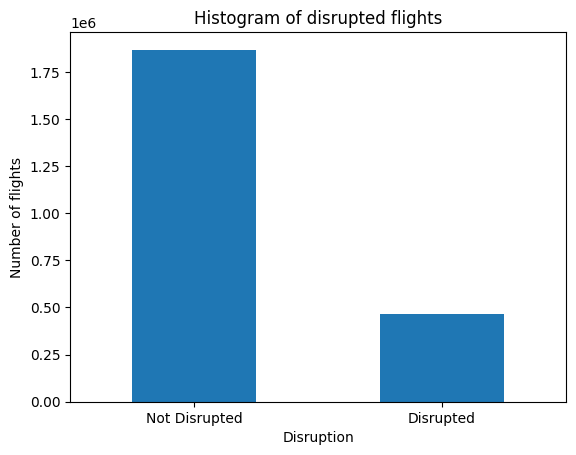

In [11]:
plt.ylabel("Number of flights")
plt.title("Histogram of disrupted flights")
flights["Disruption"].value_counts().plot(kind="bar")
plt.xticks([0, 1], ["Not Disrupted", "Disrupted"])
plt.xticks(rotation=0)


In [12]:
disrupted = flights["Disruption"].value_counts()[1]

total = len(flights)

print("Percentage of disrupted flights: ", disrupted / total * 100, "%")

/tmp/ipykernel_188860/3591043519.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  disrupted = flights["Disruption"].value_counts()[1]


Percentage of disrupted flights:  20.039401332674505 %


The attributes that I have selected to explore are:
1. Year
2. Month
3. DayOfWeek
4. DepTimeBlk
5. ArrTimeBlk
6. Operating_Airline
7. Distance
8. OriginAirportID
9. DestAirportID
10. OriginState

## The effect of Covid-19 on flight disruption

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2018'),
  Text(1, 0, '2019'),
  Text(2, 0, '2020'),
  Text(3, 0, '2021'),
  Text(4, 0, '2022')])

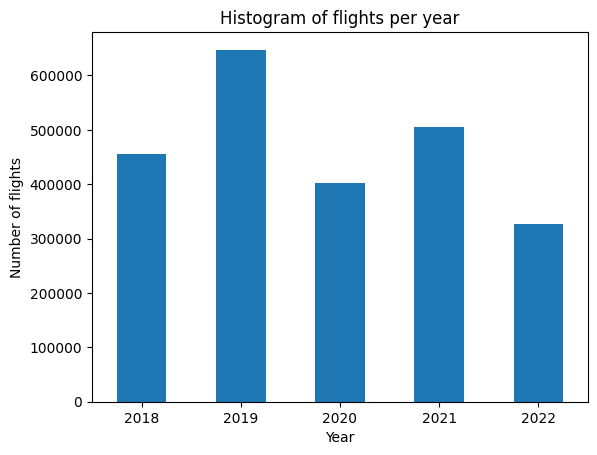

In [13]:
# Plot histogram of the number of flights per year
plt.ylabel("Number of flights")
plt.title("Histogram of flights per year")
flights["Year"].value_counts().sort_index().plot(kind="bar")
plt.xticks(rotation=0)

In [14]:
print(f'Months present in 2022: {sorted(flights[flights["Year"] == 2022]["Month"].unique())}')

Months present in 2022: [1, 2, 3, 4, 5, 6, 7]


In [15]:
print(f'Months present in 2018: {sorted(flights[flights["Year"] == 2022]["Month"].unique())}')

Months present in 2018: [1, 2, 3, 4, 5, 6, 7]


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2018'),
  Text(1, 0, '2019'),
  Text(2, 0, '2020'),
  Text(3, 0, '2021'),
  Text(4, 0, '2022')])

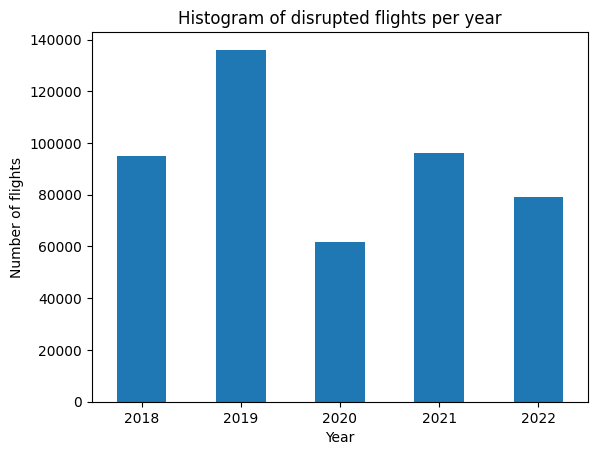

In [16]:
# plot number of disrupted flights per year
plt.ylabel("Number of flights")
plt.title("Histogram of disrupted flights per year")
flights[flights["Disruption"] == 1]["Year"].value_counts().sort_index().plot(kind="bar")
plt.xticks(rotation=0)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '2018'),
  Text(1, 0, '2019'),
  Text(2, 0, '2020'),
  Text(3, 0, '2021'),
  Text(4, 0, '2022')])

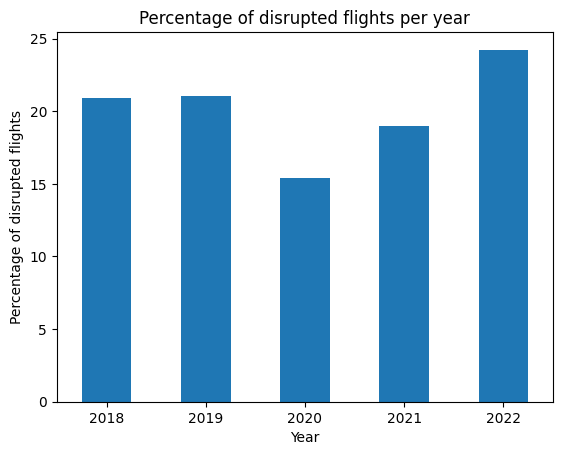

In [17]:
# Plot the percentage of disrupted flights per year
plt.ylabel("Percentage of disrupted flights")
plt.title("Percentage of disrupted flights per year")
(flights[flights["Disruption"] == 1]["Year"].value_counts().sort_index() / flights["Year"].value_counts().sort_index() * 100).plot(kind="bar")
plt.xticks(rotation=0)

COVID observations:

- COVID appears to have decreased the number of flights in 2020 and 2021 in comparison to 2019
- Potentially due to the decrease in flights, the percentage of distrupted flights during this time is lower

Post COVID observations:
- The dataset ends on August 2022 so the number of flights has decreased in total but is at a similar level to covid years
- As regulations open back up, the percentage of distrupted flights in 2022 is high

Pre COVID observations:
- Despite having all the months present in the dataset for the year 2018, I am not sure the reasoning behind why there were a lot fewer flights in this year compared to 2019


Buisness Aim Considerations:

- Given that the aim is to predict future flights, including year as an attribute may be an issue as the classifier may see an increasing trend from 2020 onwards and predict that the disruptions grow linearily over time. This is most likely not true given the anomoly our world faced during this period. Thus if year was to be used as an attribute to predict time, it would make sense to group all future flights within the same category as 2022. 2022 would then represents itself and all future years passed through to the model. I believe this makes the most sense as we are still in a world that is living post COVID and the data from 2022 is my best guess to what the best representation of what the near future would like.

## Explore the effect of Month on Disruption

- A quarter within a year may not capture the affect certain months have on distruption, thus choosing month may capture the granularity better

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

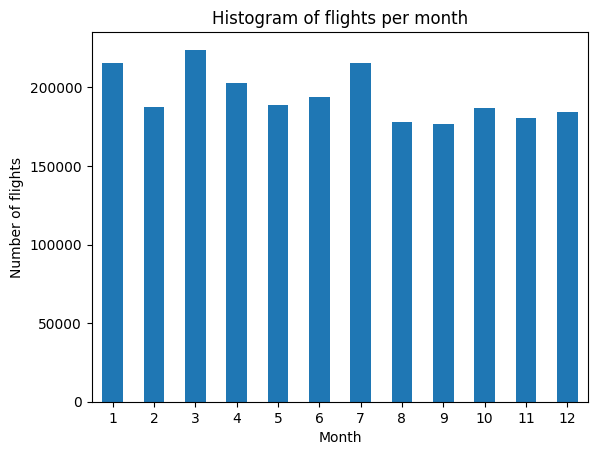

In [18]:
# Plot histogram of flights per month
plt.ylabel("Number of flights")
plt.title("Histogram of flights per month")
flights["Month"].value_counts().sort_index().plot(kind="bar")
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

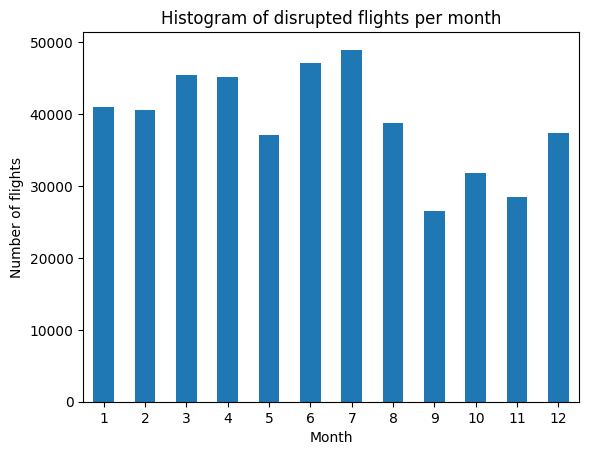

In [19]:
# Plot the number of disrupted flights per month
plt.ylabel("Number of flights")
plt.title("Histogram of disrupted flights per month")
flights[flights["Disruption"] == 1]["Month"].value_counts().sort_index().plot(kind="bar")
plt.xticks(rotation=0)

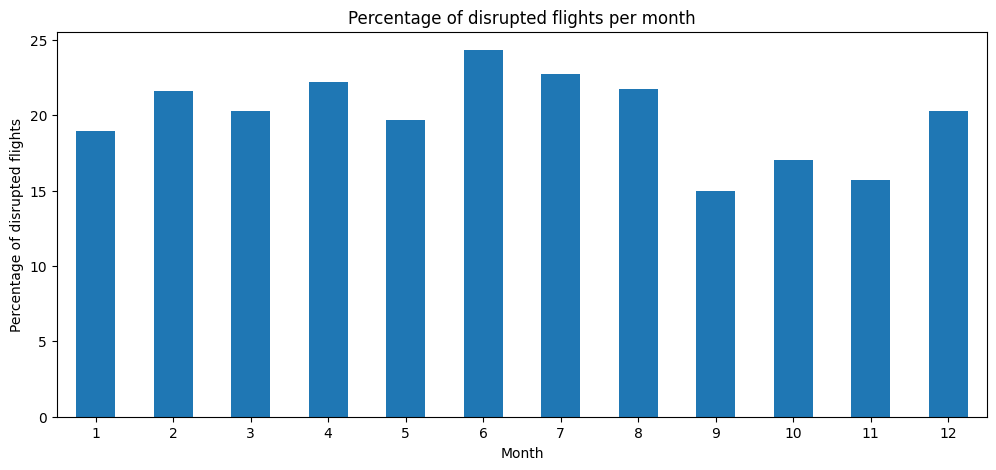

In [20]:
# Plot the percentage of disrupted flights per month
plt.ylabel("Percentage of disrupted flights")
plt.title("Percentage of disrupted flights per month")
(flights[flights["Disruption"] == 1]["Month"].value_counts().sort_index() / flights["Month"].value_counts().sort_index() * 100).plot(kind="bar")
plt.xticks(rotation=0)
plt.gcf().set_size_inches(12, 5)

Month Observations:
- In general flights appear to be evenly distributed across all the months
- The months of September, October, and November have a visual difference in the proportion of flights that are not cancelled
- June and July have relatively higher cancellation rates

## Explore effect of day of week on disruption

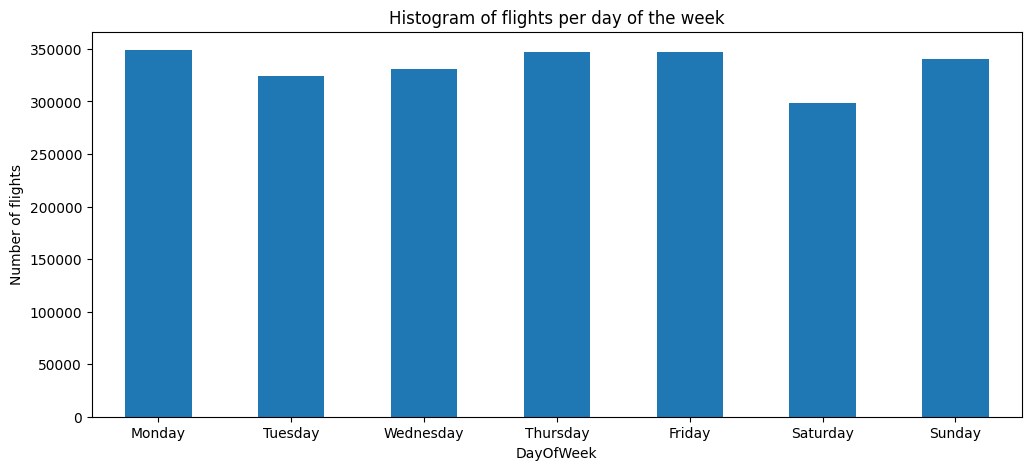

In [21]:
# Plot the number of disrupted flights per day of the week
plt.ylabel("Number of flights")
plt.title("Histogram of flights per day of the week")
flights["DayOfWeek"].value_counts().sort_index().plot(kind="bar")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xticks(rotation=0)
plt.gcf().set_size_inches(12, 5)

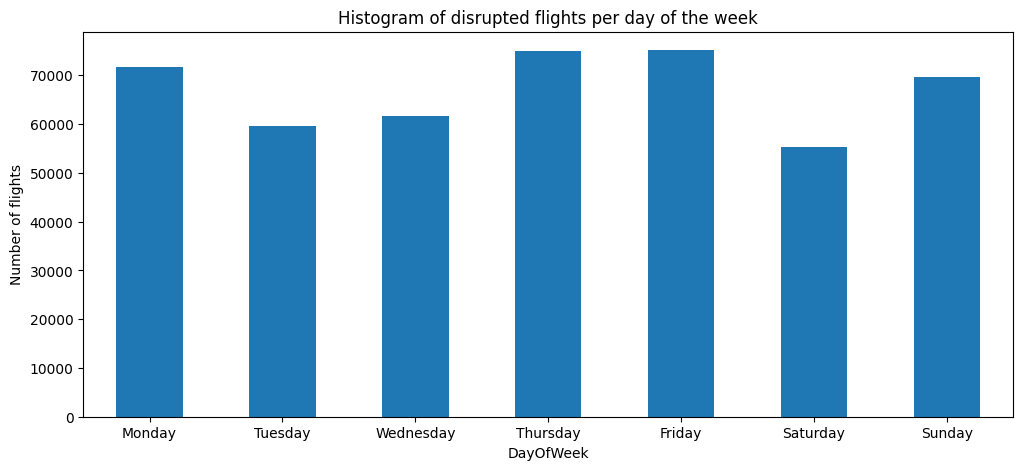

In [22]:
# Plot the number of disrupted flights per day of the week
plt.ylabel("Number of flights")
plt.title("Histogram of disrupted flights per day of the week")
flights[flights["Disruption"] == 1]["DayOfWeek"].value_counts().sort_index().plot(kind="bar")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xticks(rotation=0)
plt.gcf().set_size_inches(12, 5)

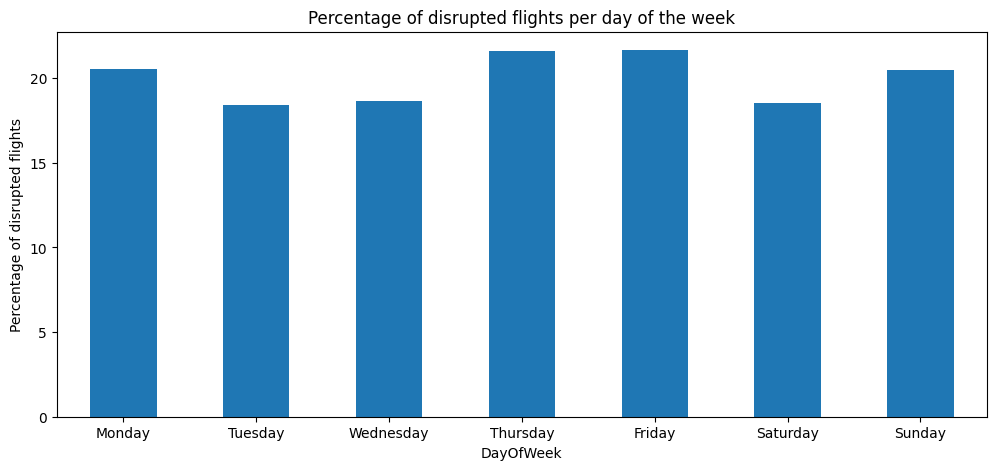

In [23]:
# Plot the percentage of disrupted flights per day of the week
plt.ylabel("Percentage of disrupted flights")
plt.title("Percentage of disrupted flights per day of the week")
(flights[flights["Disruption"] == 1]["DayOfWeek"].value_counts().sort_index() / flights["DayOfWeek"].value_counts().sort_index() * 100).plot(kind="bar")
plt.xticks([0, 1, 2, 3, 4, 5, 6], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.xticks(rotation=0)
plt.gcf().set_size_inches(12, 5)

- Observations on day of the week:
    - There appear to be more disruptions on Thursday and Friday proportionally but it may not appear to be so significant between the day of the week a flight takes off and the percentage of disruption
        - Probably will not use this attribute to train the model

## Explore the effect of departure block on disruption

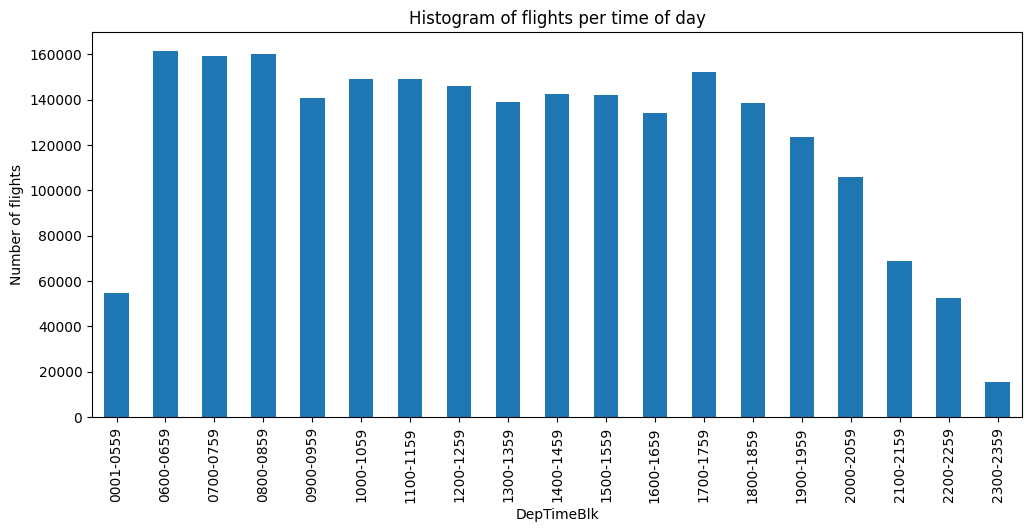

In [24]:
# Plot histogram of flights per time of day
plt.ylabel("Number of flights")
plt.title("Histogram of flights per time of day")
flights["DepTimeBlk"].value_counts().sort_index().plot(kind="bar")
plt.gcf().set_size_inches(12, 5)

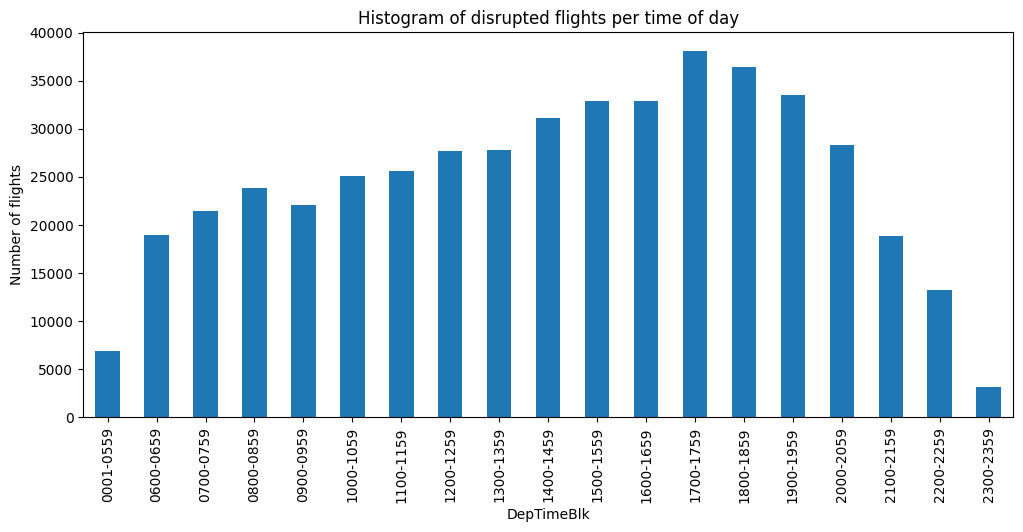

In [25]:
# Plot histogram of disrupted flights per time of day
plt.ylabel("Number of flights")
plt.title("Histogram of disrupted flights per time of day")
flights[flights["Disruption"] == 1]["DepTimeBlk"].value_counts().sort_index().plot(kind="bar")
plt.gcf().set_size_inches(12, 5)

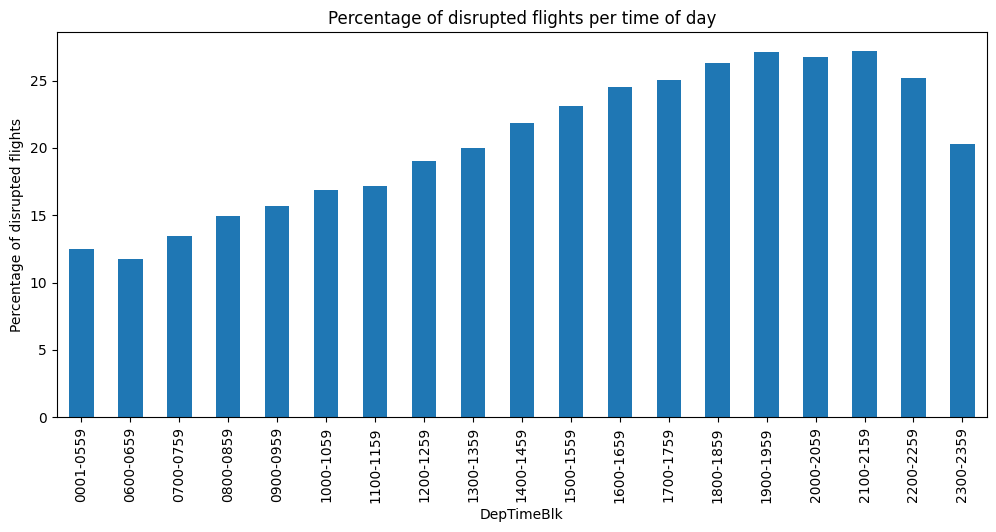

In [26]:
# Plot histogram of percentage disrupted flights per time of day
plt.ylabel("Percentage of disrupted flights")
plt.title("Percentage of disrupted flights per time of day")
(flights[flights["Disruption"] == 1]["DepTimeBlk"].value_counts().sort_index() / 
    flights["DepTimeBlk"].value_counts().sort_index() * 100).plot(kind="bar")
plt.gcf().set_size_inches(12, 5)

- Observations on time of day:
    - There are significantly less flights before and after working hours
    - The number of flights peaks at the 7pm block, this could be due to a rush of trying to get flights out at the end of a working day
    - There is a steady increase in the number of disruptions from the start of the day up til the peak. (Left skewed histogram)
        - After the 7pm block, the number and percentage of disruption decreases

## Explore the effect of expected arrival time block on disruption

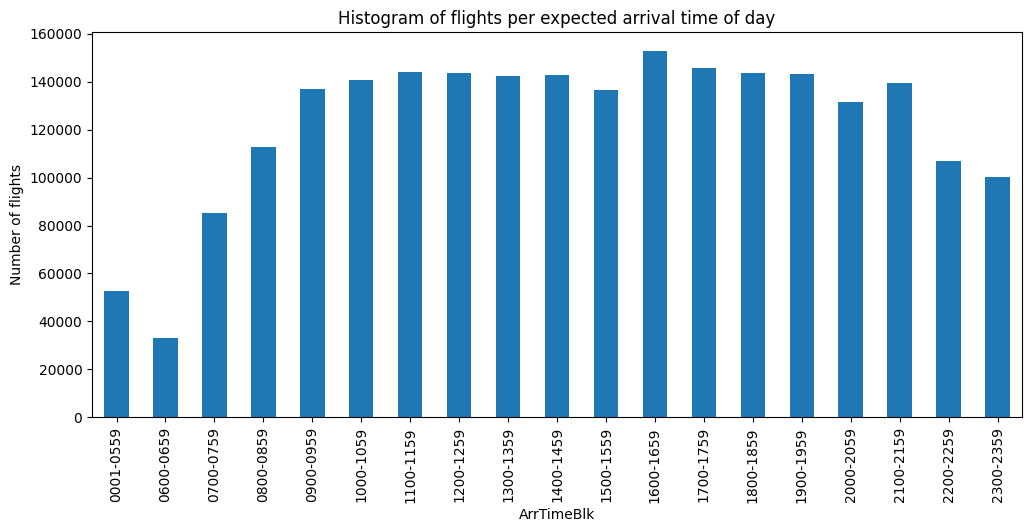

In [27]:
plt.ylabel("Number of flights")
plt.title("Histogram of flights per expected arrival time of day")
flights["ArrTimeBlk"].value_counts().sort_index().plot(kind="bar")
plt.gcf().set_size_inches(12, 5)

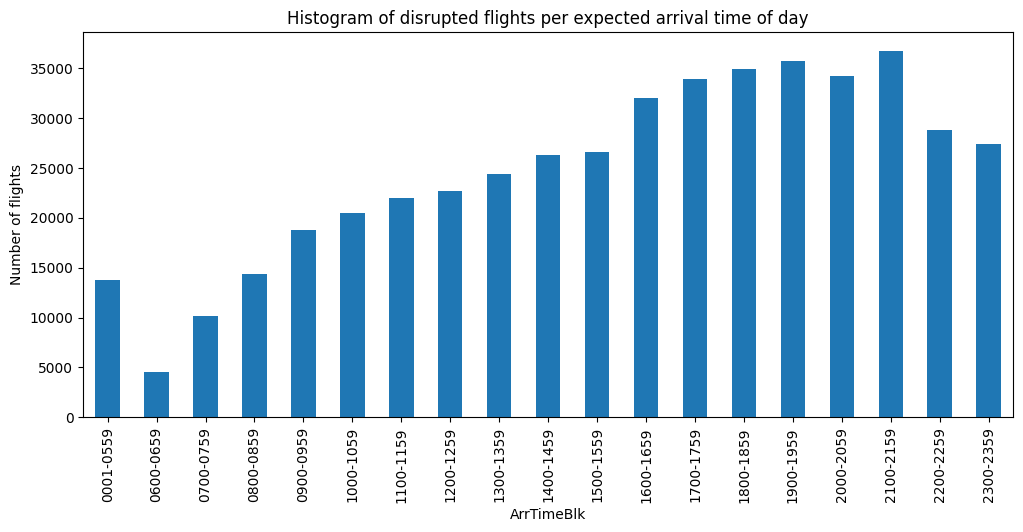

In [28]:
plt.ylabel("Number of flights")
plt.title("Histogram of disrupted flights per expected arrival time of day")
flights[flights["Disruption"] == 1]["ArrTimeBlk"].value_counts().sort_index().plot(kind="bar")
plt.gcf().set_size_inches(12, 5)

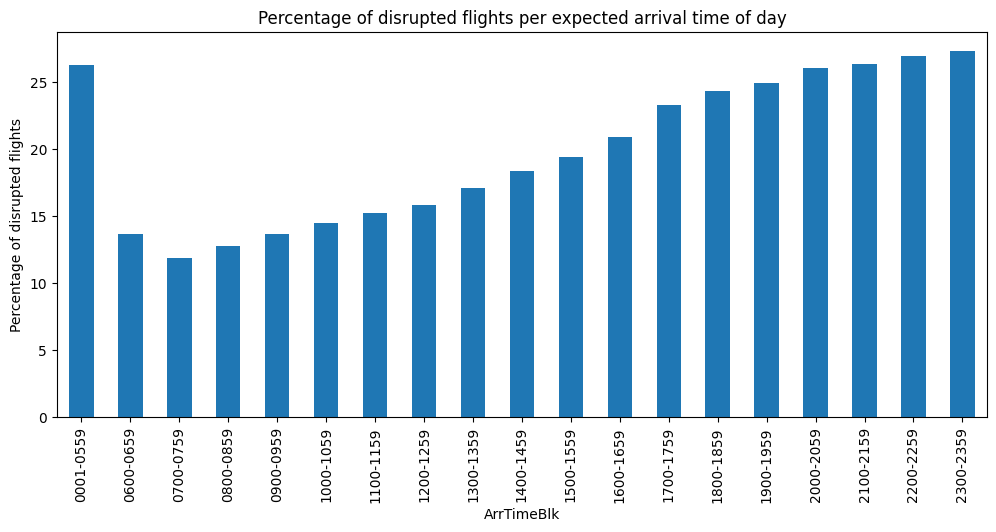

In [29]:
plt.ylabel("Percentage of disrupted flights")
plt.title("Percentage of disrupted flights per expected arrival time of day")
(flights[flights["Disruption"] == 1]["ArrTimeBlk"].value_counts().sort_index() 
    / flights["ArrTimeBlk"].value_counts().sort_index() * 100).plot(kind="bar")
plt.gcf().set_size_inches(12, 5)


- Observations on expected arrival time block of day on disruptions:
    - There are less flights expected to land at the earlist hours of the day
        - Probably due to the correlation between how little flights take off at the end of the day
    - Follows a similar disruption trend to the departure time block of day where there is a steady increase in the number of disrupted flights up til the 21:00 time block
        - The percentage of disrupted flights however continues to linearly increase from 6:00 to 23:00.
            - The time block 00:01-05:59 time block should probably be thought of as a continuation after 23:00-23:59 if it were to be used as a feature

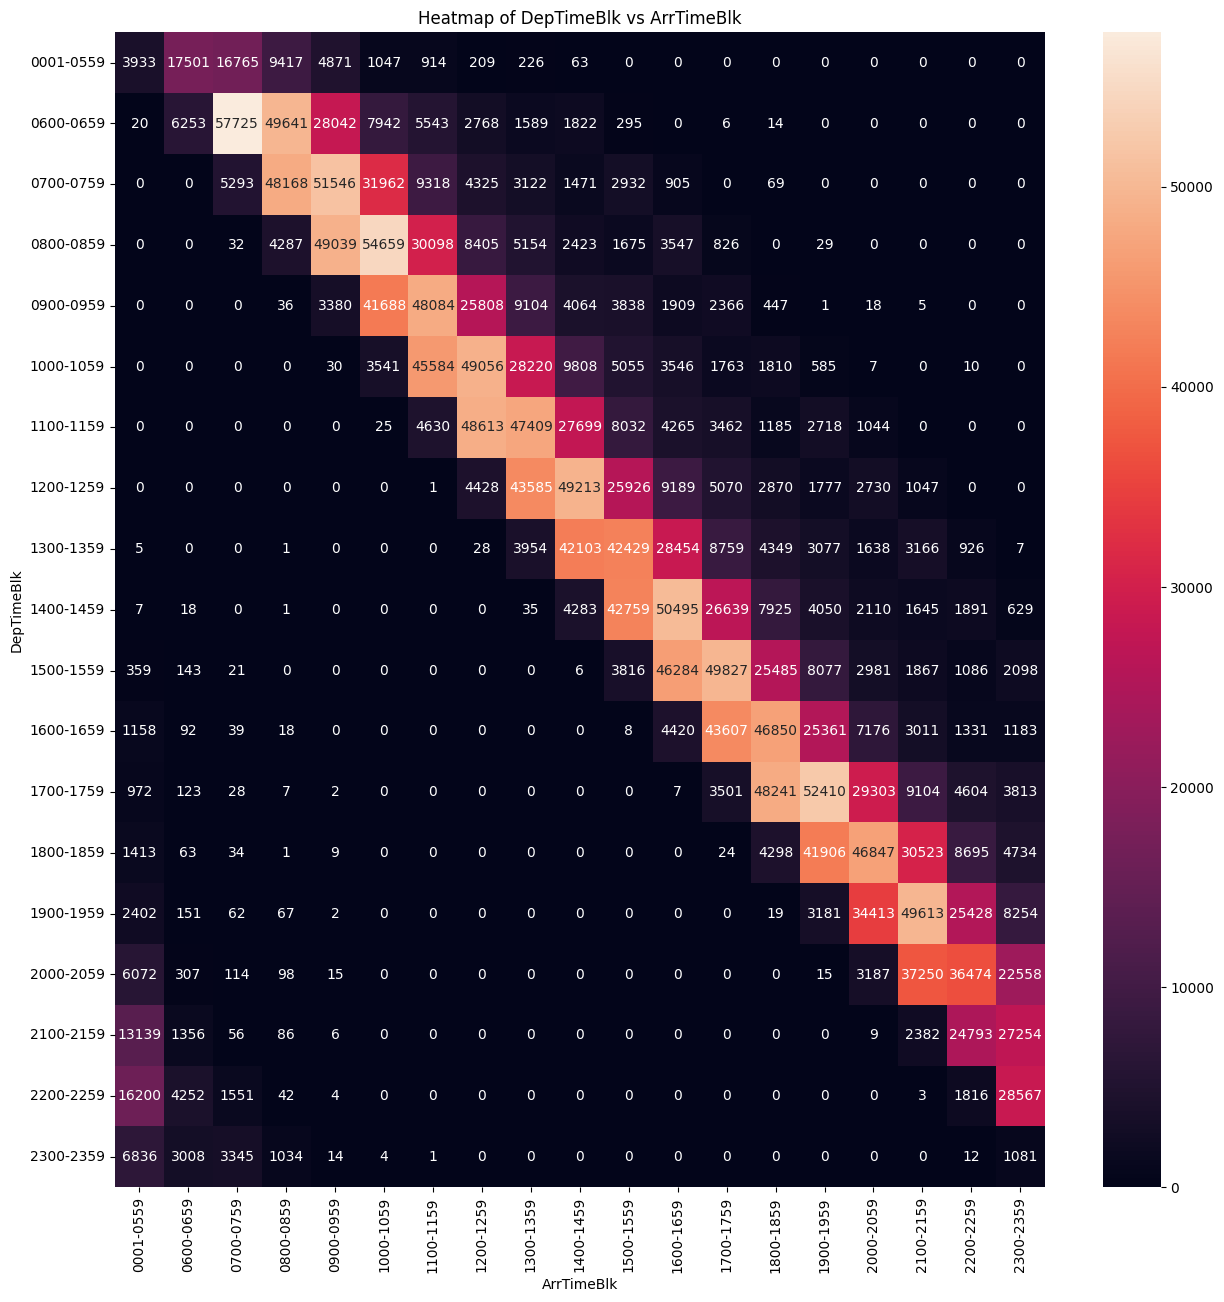

In [30]:
contingency_table = pandas.crosstab(flights["DepTimeBlk"], flights["ArrTimeBlk"])

sns.heatmap(contingency_table, annot=True, fmt="d")

plt.title('Heatmap of DepTimeBlk vs ArrTimeBlk')
plt.xlabel('ArrTimeBlk')
plt.ylabel('DepTimeBlk')
plt.gcf().set_size_inches(15, 15)
plt.show()

- The heatmap above shows that the departure time block and expected arrival time block are highly correlated linearly, probably due to the contraint that the number of flights are domestic within US and its territories, meaning long haul flights are limited and more shorter flights are more common
    - Therefore probably good to only use one of these attributes to train the model

## Explore the effect of Airline on Disruption

In [31]:
print(f'Unique operating airlines: {flights["Operating_Airline"].nunique()}')


Unique operating airlines: 28


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'WN'),
  Text(1, 0, 'DL'),
  Text(2, 0, 'OO'),
  Text(3, 0, 'AA'),
  Text(4, 0, 'UA'),
  Text(5, 0, 'YX'),
  Text(6, 0, 'B6'),
  Text(7, 0, 'MQ'),
  Text(8, 0, '9E'),
  Text(9, 0, 'OH'),
  Text(10, 0, 'AS'),
  Text(11, 0, 'NK'),
  Text(12, 0, 'YV'),
  Text(13, 0, 'F9'),
  Text(14, 0, 'G4'),
  Text(15, 0, 'QX'),
  Text(16, 0, 'PT'),
  Text(17, 0, 'ZW'),
  Text(18, 0, 'EV'),
  Text(19, 0, 'HA'),
  Text(20, 0, 'G7'),
  Text(21, 0, 'C5'),
  Text(22, 0, 'AX'),
  Text(23, 0, 'CP'),
  Text(24, 0, 'EM'),
  Text(25, 0, 'VX'),
  Text(26, 0, 'KS'),
  Text(27, 0, '9K')])

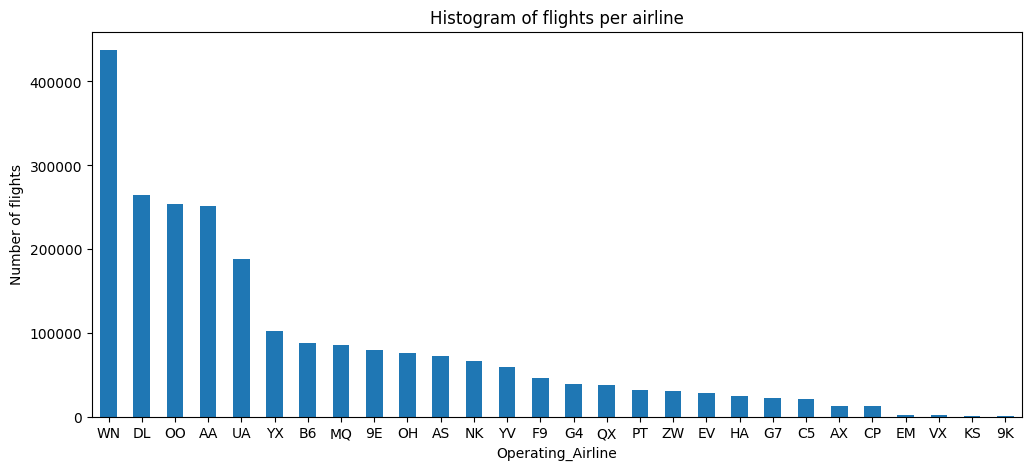

In [32]:
plt.ylabel("Number of flights")
plt.title("Histogram of flights per airline")
flights["Operating_Airline"].value_counts().plot(kind="bar")
plt.gcf().set_size_inches(12, 5)
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'WN'),
  Text(1, 0, 'AA'),
  Text(2, 0, 'OO'),
  Text(3, 0, 'UA'),
  Text(4, 0, 'DL'),
  Text(5, 0, 'B6'),
  Text(6, 0, 'YX'),
  Text(7, 0, 'MQ'),
  Text(8, 0, 'OH'),
  Text(9, 0, 'NK'),
  Text(10, 0, 'AS'),
  Text(11, 0, 'YV'),
  Text(12, 0, 'F9'),
  Text(13, 0, '9E'),
  Text(14, 0, 'G4'),
  Text(15, 0, 'EV'),
  Text(16, 0, 'ZW'),
  Text(17, 0, 'C5'),
  Text(18, 0, 'QX'),
  Text(19, 0, 'PT'),
  Text(20, 0, 'G7'),
  Text(21, 0, 'AX'),
  Text(22, 0, 'HA'),
  Text(23, 0, 'CP'),
  Text(24, 0, 'EM'),
  Text(25, 0, 'VX'),
  Text(26, 0, 'KS'),
  Text(27, 0, '9K')])

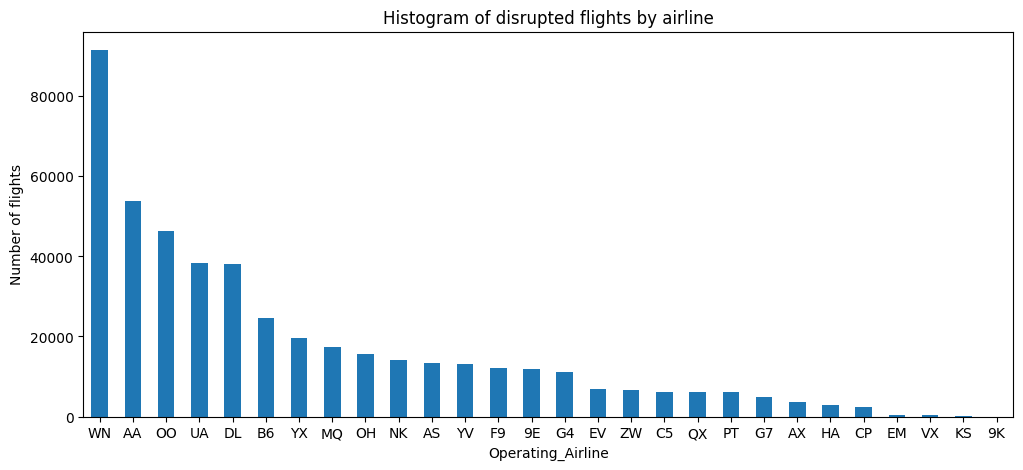

In [33]:
plt.ylabel("Number of flights")
plt.title("Histogram of disrupted flights by airline")
flights[flights["Disruption"] == 1]["Operating_Airline"].value_counts().plot(kind="bar")
plt.gcf().set_size_inches(12, 5)
plt.xticks(rotation=0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'KS'),
  Text(1, 0, 'C5'),
  Text(2, 0, 'AX'),
  Text(3, 0, 'G4'),
  Text(4, 0, 'B6'),
  Text(5, 0, 'F9'),
  Text(6, 0, 'VX'),
  Text(7, 0, 'EV'),
  Text(8, 0, 'G7'),
  Text(9, 0, 'YV'),
  Text(10, 0, 'ZW'),
  Text(11, 0, 'AA'),
  Text(12, 0, 'NK'),
  Text(13, 0, 'WN'),
  Text(14, 0, 'EM'),
  Text(15, 0, 'OH'),
  Text(16, 0, 'MQ'),
  Text(17, 0, 'UA'),
  Text(18, 0, 'PT'),
  Text(19, 0, 'YX'),
  Text(20, 0, 'CP'),
  Text(21, 0, 'AS'),
  Text(22, 0, 'OO'),
  Text(23, 0, 'QX'),
  Text(24, 0, '9E'),
  Text(25, 0, 'DL'),
  Text(26, 0, 'HA'),
  Text(27, 0, '9K')])

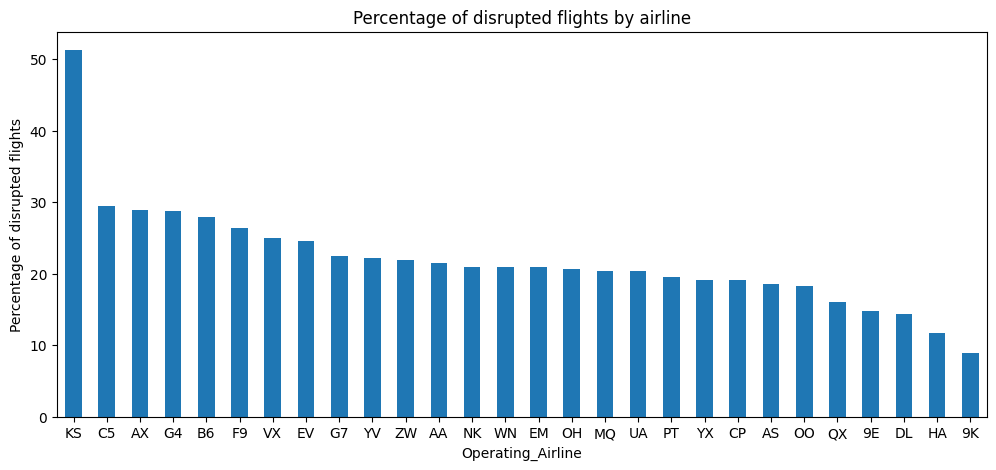

In [34]:
plt.ylabel("Percentage of disrupted flights")
plt.title("Percentage of disrupted flights by airline")
(flights[flights["Disruption"] == 1]["Operating_Airline"].value_counts() 
    / flights["Operating_Airline"].value_counts() * 100).sort_values(ascending=False).plot(kind="bar")
plt.gcf().set_size_inches(12, 5)
plt.xticks(rotation=0)

In [35]:
print(f'Number of entries for KS: {flights[flights["Operating_Airline"].str.contains("KS")].shape[0]}')

print(f'Percentage of entries for KS: {flights[flights["Operating_Airline"].str.contains("KS")].shape[0] / flights.shape[0] * 100}')

Number of entries for KS: 234
Percentage of entries for KS: 0.010019465166087621


In [36]:
flights[flights["Operating_Airline"].str.contains("KS")].head(5)

,FlightDate,Airline,Origin,Dest,CRSDepTime,CRSElapsedTime,Distance,Year,Quarter,Month,DayofMonth,DayOfWeek,Marketing_Airline_Network,Operated_or_Branded_Code_Share_Partners,DOT_ID_Marketing_Airline,IATA_Code_Marketing_Airline,Flight_Number_Marketing_Airline,Operating_Airline,DOT_ID_Operating_Airline,IATA_Code_Operating_Airline,Tail_Number,Flight_Number_Operating_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,OriginCityName,ORIGINCITYNAMEEXTRA,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,DestCityName,DESTCITYNAMEEXTRA,DestState,DestStateFips,DestStateName,DestWac,DepTimeBlk,CRSArrTime,ArrTimeBlk,DistanceGroup,Disruption
910157,2018-11-01,Peninsula Airways Inc.,ANC,DUT,945,135.0,792,2018,4,11,1,4,AS,AS_CODESHARE,19930,AS,3298,KS,20225,KS,N681PA,3298,10299,1029906,30299,Anchorage,AK,AK,2,Alaska,1,11445,1144505,31445,Unalaska,AK,AK,2,Alaska,1,0900-0959,1200,1200-1259,4,False
918540,2018-07-14,Peninsula Airways Inc.,DUT,ANC,1455,150.0,792,2018,3,7,14,6,AS,AS_CODESHARE,19930,AS,3295,KS,20225,KS,N680PA,3295,11445,1144505,31445,Unalaska,AK,AK,2,Alaska,1,10299,1029906,30299,Anchorage,AK,AK,2,Alaska,1,1400-1459,1725,1700-1759,4,False
921178,2018-01-12,Peninsula Airways Inc.,DUT,ANC,1025,150.0,792,2018,1,1,12,5,AS,AS_CODESHARE,19930,AS,3277,KS,20225,KS,N682PA,3277,11445,1144505,31445,Unalaska,AK,AK,2,Alaska,1,10299,1029906,30299,Anchorage,AK,AK,2,Alaska,1,1000-1059,1255,1200-1259,4,False
929756,2018-11-11,Peninsula Airways Inc.,DUT,ANC,1240,150.0,792,2018,4,11,11,7,AS,AS_CODESHARE,19930,AS,3299,KS,20225,KS,N681PA,3299,11445,1144505,31445,Unalaska,AK,AK,2,Alaska,1,10299,1029906,30299,Anchorage,AK,AK,2,Alaska,1,1200-1259,1510,1500-1559,4,True
936070,2018-04-30,Peninsula Airways Inc.,ANC,DUT,945,135.0,792,2018,2,4,30,1,AS,AS_CODESHARE,19930,AS,3298,KS,20225,KS,N681PA,3298,10299,1029906,30299,Anchorage,AK,AK,2,Alaska,1,11445,1144505,31445,Unalaska,AK,AK,2,Alaska,1,0900-0959,1200,1200-1259,4,True


- Despite operating airlines like Peninsula Airways Inc. having a high percentage of distrubted flights, there are so few entries in proportion to the dataset that it may not be representitive of predictions
    1. It may therefore more useful to look at the top airlines with disrupted flights that have significant numbers of entries in the dataset
    2. On the other hand, it may be good for predicting future flights as if the model has only seen an airline a few times, it may be good to hypothesize that there is a higher chance that this flight would get cancelled

### Exploring how the number of entries an airline has correlate with disruption

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'C5'),
  Text(1, 0, 'AX'),
  Text(2, 0, 'G4'),
  Text(3, 0, 'B6'),
  Text(4, 0, 'F9'),
  Text(5, 0, 'VX'),
  Text(6, 0, 'EV'),
  Text(7, 0, 'G7'),
  Text(8, 0, 'YV'),
  Text(9, 0, 'ZW'),
  Text(10, 0, 'AA'),
  Text(11, 0, 'NK'),
  Text(12, 0, 'WN'),
  Text(13, 0, 'EM'),
  Text(14, 0, 'OH'),
  Text(15, 0, 'MQ'),
  Text(16, 0, 'UA'),
  Text(17, 0, 'PT'),
  Text(18, 0, 'YX'),
  Text(19, 0, 'CP')])

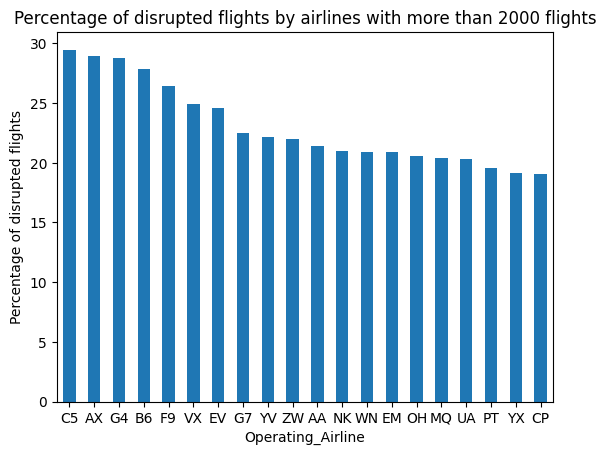

In [37]:
# Plot the histogram of top 5 airlines by percentage of disrupted flights (excluding airlines with less than 2000 flights)
plt.ylabel("Percentage of disrupted flights")
plt.title("Percentage of disrupted flights by airlines with more than 2000 flights")
flights["Operating_Airline"].value_counts().loc[lambda x: x > 2000].index
(flights[flights["Disruption"] == 1]["Operating_Airline"].value_counts() / flights["Operating_Airline"].value_counts() * 100).sort_values(ascending=False).loc[lambda x: flights["Operating_Airline"].value_counts() > 1000].head(20).plot(kind="bar")
plt.xticks(rotation=0)


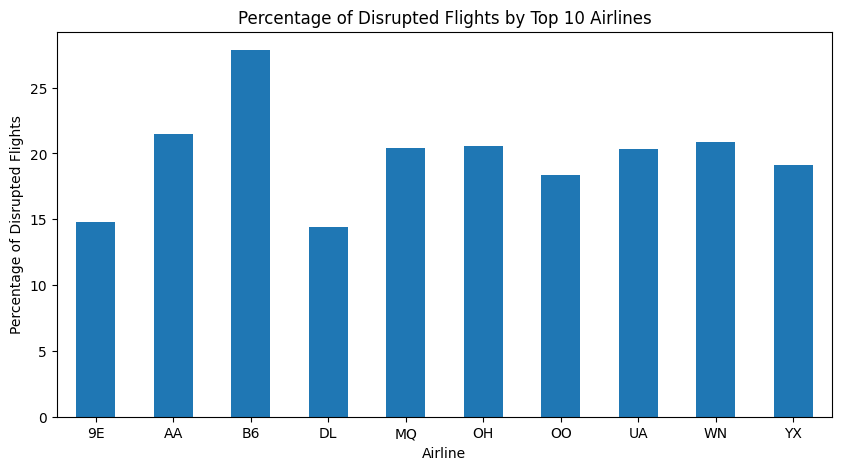

In [38]:
# Plot the percentage of disrupted flights by airline using the same axis as the previous plot
flights[flights["Disruption"] == 1]["Operating_Airline"].value_counts().head(10)

top_10_airlines = flights["Operating_Airline"].value_counts().head(10).index.tolist()

top_10_flights = flights[flights["Operating_Airline"].isin(top_10_airlines)]
top_10_flights_disruption_percentage = (top_10_flights.groupby("Operating_Airline")["Disruption"].mean() * 100)

plt.figure(figsize=(10, 5))
top_10_flights_disruption_percentage.plot(kind='bar')
plt.title('Percentage of Disrupted Flights by Top 10 Airlines')
plt.xlabel('Airline')
plt.ylabel('Percentage of Disrupted Flights')
plt.xticks(rotation=0)
plt.show()


In [39]:
# Find the min, max, mean, median and standard deviation of the each airline's percentage of disrupted flights
print("Min, max, mean, median and standard deviation of the each airline's percentage of disrupted flights")

disruption_percentage = (flights.groupby("Operating_Airline")["Disruption"].mean() * 100)

print(disruption_percentage.agg(['min', 'max', 'mean', 'median', 'std']))

Q1 = disruption_percentage.quantile(0.25)
Q3 = disruption_percentage.quantile(0.75)

print(f'\nQ1: {Q1}, Q3: {Q3}')

Min, max, mean, median and standard deviation of the each airline's percentage of disrupted flights
min        8.955224
max       51.282051
mean      21.956482
median    20.895987
std        7.598553
Name: Disruption, dtype: float64

Q1: 18.91819623904837, Q3: 24.69239584514187


In [40]:
number_of_entries_per_airline = flights["Operating_Airline"].value_counts()

percentage_of_entries_per_airline = (flights["Operating_Airline"].value_counts() / len(flights) * 100)

# percentage of disrupted flights per airline
disruption_percentage_per_airline = (flights.groupby("Operating_Airline")["Disruption"].mean() * 100)

data = {
    'Number_of_entries': number_of_entries_per_airline,
    'Percentage_of_entries': percentage_of_entries_per_airline,
    'Percent_of_disrupted_flights': disruption_percentage_per_airline
}
df = pandas.DataFrame(data)

# Reset the index of the DataFrame to make the 'Operating_Airline' column accessible
df.reset_index(inplace=True)

# Rename the 'index' column to 'Operating_Airline'
df.rename(columns={'index': 'Operating_Airline'}, inplace=True)

print(df)

   Operating_Airline  Number_of_entries  Percentage_of_entries  \
0                 9E              79542               3.405847   
1                 9K                134               0.005738   
2                 AA             251078              10.750715   
3                 AS              72376               3.099012   
4                 AX              12898               0.552269   
5                 B6              88237               3.778152   
6                 C5              20886               0.894301   
7                 CP              12523               0.536213   
8                 DL             264143              11.310135   
9                 EM               1867               0.079942   
10                EV              28289               1.211285   
11                F9              45528               1.949428   
12                G4              39064               1.672651   
13                G7              22282               0.954076   
14        

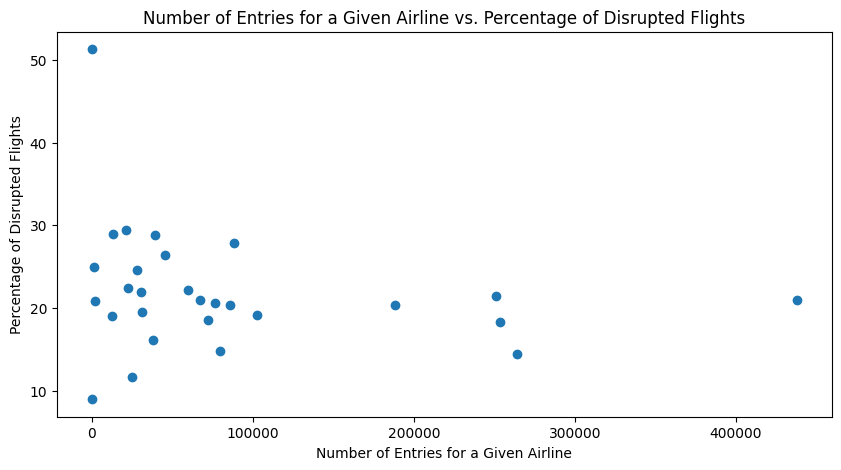

In [41]:
plt.figure(figsize=(10, 5))
plt.scatter(df["Number_of_entries"], df["Percent_of_disrupted_flights"])
plt.title('Number of Entries for a Given Airline vs. Percentage of Disrupted Flights')
plt.xlabel('Number of Entries for a Given Airline')
plt.ylabel('Percentage of Disrupted Flights')
plt.show()

- On average, you can expect to have a disrupted flight around 21% of the time
    - If an airline has few entries in the dataset, it has a higher variation in terms of the chance of disruption as seen by the main cluster
        - These airlines with few entries also experience distruptions of 25%+, which is not common for airlines with more entries
            - This transformation to represent a given airline as some form of number proportional to its entry may therefore be useful (any unseen entries predict can be automatically set to 0)

## Explore the effect of distance on Disruption

In [42]:
print(f'Maximum distance: {flights["Distance"].max()}')
print(f'Minimum distance: {flights["Distance"].min()}')
print(f'Average distance: {flights["Distance"].mean()}')
print(f'Standard deviation: {flights["Distance"].std()}')

Maximum distance: 5812
Minimum distance: 16
Average distance: 779.4747321077615
Standard deviation: 580.4467317105795


<Axes: title={'center': 'Boxplot of distance'}, ylabel='Distance'>

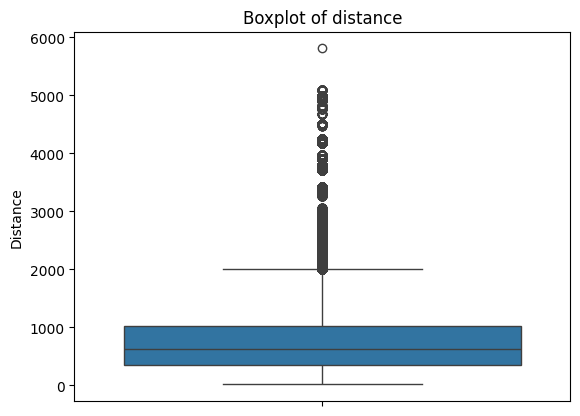

In [43]:
plt.ylabel("Distance")
plt.title("Boxplot of distance")
sns.boxplot(data=flights, y="Distance")

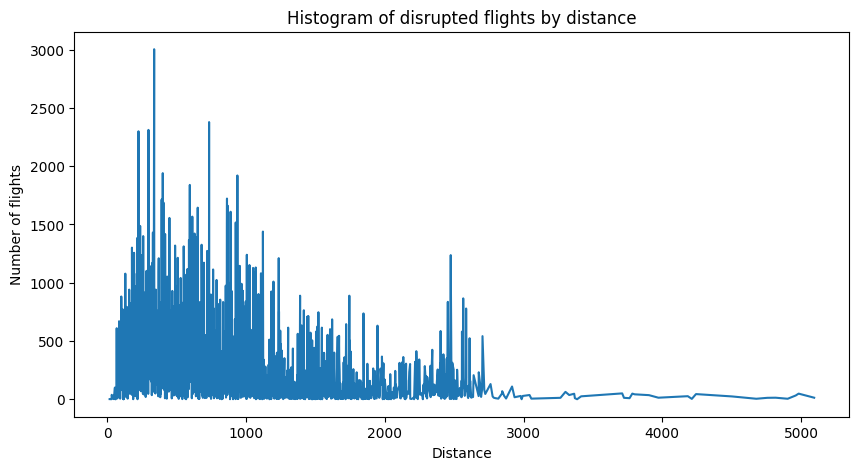

In [44]:
plt.ylabel("Number of flights")
plt.title("Histogram of disrupted flights by distance")
flights[flights["Disruption"] == 1]["Distance"].value_counts().sort_index().plot()
plt.gcf().set_size_inches(10, 5)

In [45]:
print(f'Number of flights with distance greater than 2500: {len(flights[flights["Distance"] > 2500])}')
print(f'Number of flights with distance greater than 2525: {len(flights[flights["Distance"] > 2625])}')
print(f'Number of flights with distance greater than 2500: {len(flights[flights["Distance"] > 2750])}')
print(f'Number of flights with distance greater than 3000: {len(flights[flights["Distance"] > 3000])}')
print(f'Number of flights with distance greater than 3500: {len(flights[flights["Distance"] > 3500])}')

Number of flights with distance greater than 2500: 39683
Number of flights with distance greater than 2525: 14594
Number of flights with distance greater than 2500: 7146
Number of flights with distance greater than 3000: 4014
Number of flights with distance greater than 3500: 2731


In [46]:
print(f'Percentage of flights with distance greater than 2500: {len(flights[flights["Distance"] > 2500]) / len(flights) * 100}')
print(f'Percentage of flights with distance greater than 2625: {len(flights[flights["Distance"] > 2625]) / len(flights) * 100}')
print(f'Percentage of flights with distance greater than 2750: {len(flights[flights["Distance"] > 2750]) / len(flights) * 100}')
print(f'Percentage of flights with distance greater than 3000: {len(flights[flights["Distance"] > 3000]) / len(flights) * 100}')

Percentage of flights with distance greater than 2500: 1.6991557101959618
Percentage of flights with distance greater than 2625: 0.6248892078371058
Percentage of flights with distance greater than 2750: 0.30597905161052197
Percentage of flights with distance greater than 3000: 0.17187236400288766


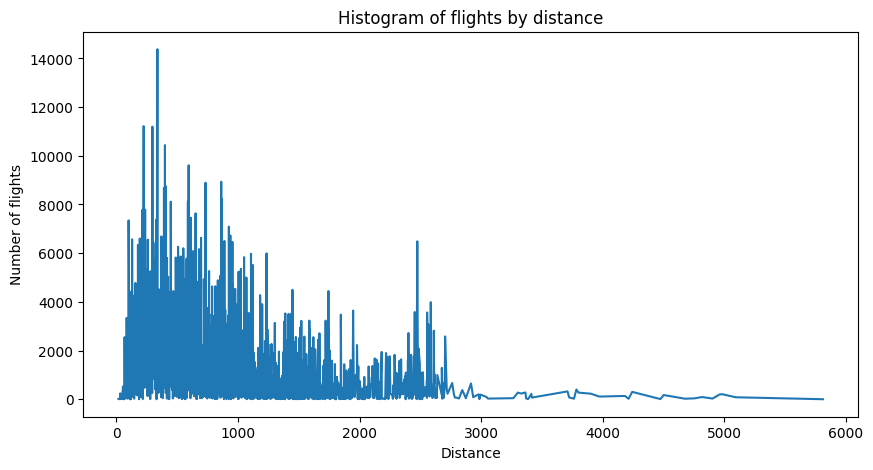

In [47]:
plt.ylabel("Number of flights")
plt.title("Histogram of flights by distance")
flights["Distance"].value_counts().sort_index().plot()
plt.gcf().set_size_inches(10, 5)

In [48]:
df = flights[flights["Distance"] > 2750]

disrupted_flights = len(df[df["Disruption"] == 1]["Distance"])

num_flights_over_2750 = len(df)

percentage_disrupted_flights = disrupted_flights / num_flights_over_2750 * 100


print("Percentage of disrupted flights given flights are over 2625 miles ", percentage_disrupted_flights)

Percentage of disrupted flights given flights are over 2625 miles  17.46431570109152


- Overvations on Distance:
    - Non-linear M shaped pattern where the number of disruptions for shorter flights are more common with a smaller spike at around 2,5000 miles 
    - Outliers of long distance flights present in the dataset, these flights are disrupted lower than average
        - As a transformation, it may be useful to cap all flights that fly more than 2,750 miles to 2,750 miles so that when the data is normalised, these large values do not skew the process

## Explore the effect of origin & destination airport on Disruption

Given that I can only choose up to 10 features, I decided to choose both origin and destination airport on disruption as my 8th and 9th attribute as opposed to origin and destination state. This is because similar to month attribute, exploring the affect of origin state may not capture the full picture in comparison to the airport itself. The trade-off is that there might be a more widespread patterns that I may be missing out

In [49]:
print(f'Number of airports: {len(flights["OriginAirportID"].unique())}')

Number of airports: 387


Look at the airports with the most entries first to see if any pattern emerges:

In [50]:
top_10_origin_airports = flights["OriginAirportID"].value_counts().head(10)

print(f'Top 10 origin airports: {sorted(flights[flights["OriginAirportID"].isin(top_10_origin_airports.index)]["Origin"].unique())}')

top_10_dest_airports = flights["DestAirportID"].value_counts().head(10)

print(f'Top 10 destination airports: {sorted(flights[flights["DestAirportID"].isin(top_10_dest_airports.index)]["Dest"].unique())}')

# find intersection of top 10 origin and destination airports
intersection = top_10_origin_airports.index.intersection(top_10_dest_airports.index)

print(f'Top 10 origin and destination airports intersection: {sorted(flights[flights["OriginAirportID"].isin(intersection)]["Origin"].unique())}')

Top 10 origin airports: ['ATL', 'CLT', 'DEN', 'DFW', 'IAH', 'LAS', 'LAX', 'ORD', 'PHX', 'SEA']
Top 10 destination airports: ['ATL', 'CLT', 'DEN', 'DFW', 'IAH', 'LAS', 'LAX', 'ORD', 'PHX', 'SEA']
Top 10 origin and destination airports intersection: ['ATL', 'CLT', 'DEN', 'DFW', 'IAH', 'LAS', 'LAX', 'ORD', 'PHX', 'SEA']


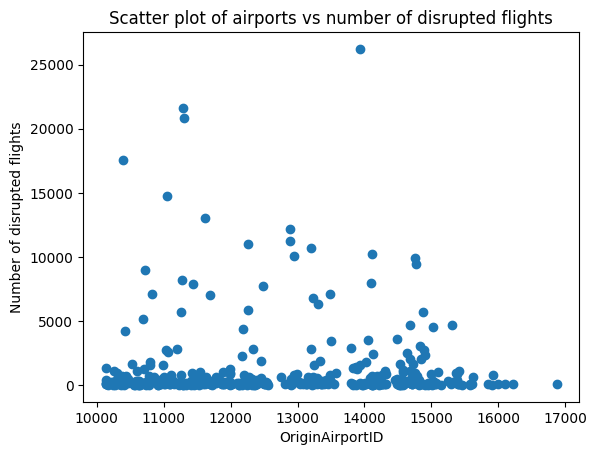

In [51]:
# Filter flights for disrupted flights
disrupted_flights = flights[flights["Disruption"] == 1]

# Count the number of disrupted flights for each airport
disrupted_flights_per_airport = disrupted_flights["OriginAirportID"].value_counts()

# Create scatter plot
plt.scatter(disrupted_flights_per_airport.index, disrupted_flights_per_airport.values)
plt.xlabel("OriginAirportID")
plt.ylabel("Number of disrupted flights")
plt.title("Scatter plot of airports vs number of disrupted flights")
plt.show()

Did not expect any trend given that there is no inhert order to the airport ID

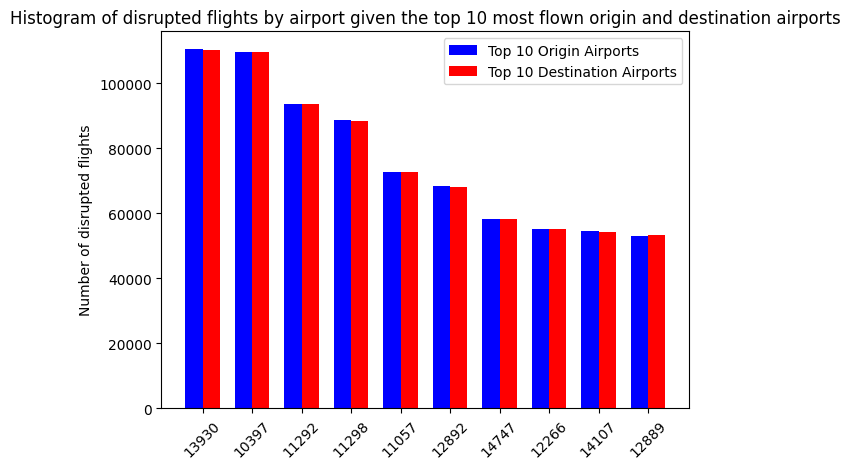

In [52]:
df = pandas.DataFrame({'Origin': top_10_origin_airports, 'Destination': top_10_dest_airports})

df = df.fillna(0)

top_airpots = top_10_origin_airports + top_10_dest_airports

x = np.arange(len(top_airpots))

bar_width = 0.35

# Plot the histogram for origin airports
plt.bar(x - bar_width/2, df['Origin'], bar_width, color='b', label='Top 10 Origin Airports')

# Plot the histogram for destination airports
plt.bar(x + bar_width/2, df['Destination'], bar_width, color='r', label='Top 10 Destination Airports')

# Set labels and title
plt.ylabel("Number of disrupted flights")
plt.title("Histogram of disrupted flights by airport given the top 10 most flown origin and destination airports")
plt.xticks(x, df.index, rotation=45)

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

Plotting the airports with the highest proportion of disrupted flights:

Text(0, 0.5, 'Percentage of disrupted flights')

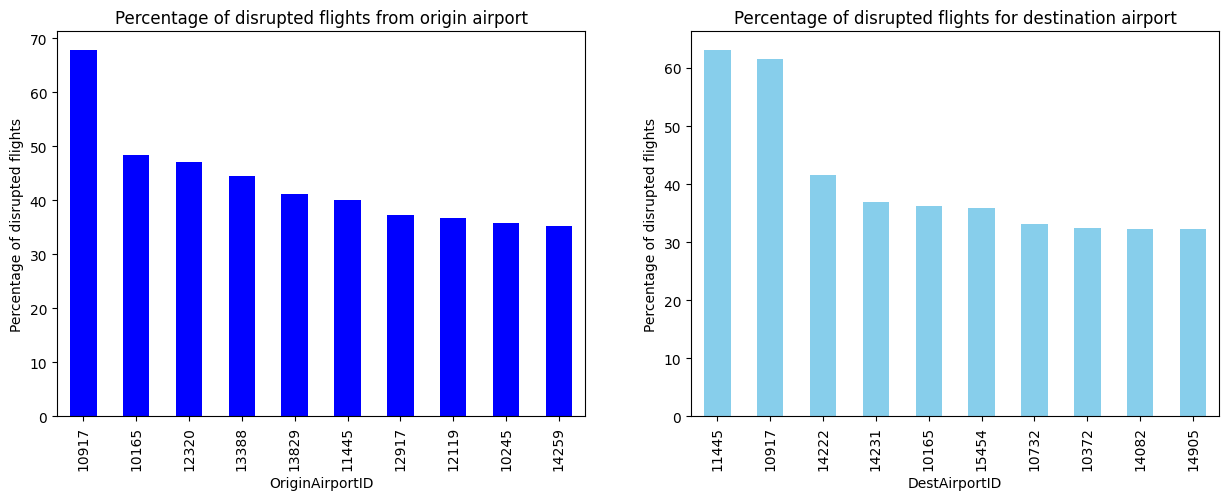

In [53]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

(flights[flights["Disruption"] == 1]["OriginAirportID"].value_counts() / 
    flights["OriginAirportID"].value_counts() * 100).sort_values(ascending=False).head(10).plot(kind="bar", ax=axs[0],color ='b')
axs[0].set_title('Percentage of disrupted flights from origin airport')
axs[0].set_ylabel('Percentage of disrupted flights')

(flights[flights["Disruption"] == 1]["DestAirportID"].value_counts() / 
    flights["DestAirportID"].value_counts() * 100).sort_values(ascending=False).head(10).plot(kind="bar", ax=axs[1],color ='skyblue')
axs[1].set_title('Percentage of disrupted flights for destination airport')
axs[1].set_ylabel('Percentage of disrupted flights')

Intersection of airports with the most disrupted flights and airports with the highest percentage of disrupted flights

In [54]:
top_10_disrupted_airports = set(disrupted_flights["OriginAirportID"].value_counts().head(10).index)
top_10_disrupted_airports_percentage = set((flights[flights["Disruption"] == 1]["OriginAirportID"].value_counts() / flights["OriginAirportID"].value_counts() * 100).sort_values(ascending=False).head(10).index)
top_10_disrupted_airports.intersection(top_10_disrupted_airports_percentage)

set()

In [55]:
for airport in (flights[flights["Disruption"] == 1]["OriginAirportID"].value_counts() / flights["OriginAirportID"].value_counts() * 100).sort_values(ascending=False).head(10).index:
    print(f'Number of entries for origin airport {airport}: {len(flights[flights["OriginAirportID"] == airport])}')

for airport in (flights[flights["Disruption"] == 1]["DestAirportID"].value_counts() / flights["DestAirportID"].value_counts() * 100).sort_values(ascending=False).head(10).index:
    print(f'Number of entries for destination airport {airport}: {len(flights[flights["DestAirportID"] == airport])}')

Number of entries for origin airport 10917: 28
Number of entries for origin airport 10165: 31
Number of entries for origin airport 12320: 17
Number of entries for origin airport 13388: 117
Number of entries for origin airport 13829: 34
Number of entries for origin airport 11445: 120
Number of entries for origin airport 12917: 426
Number of entries for origin airport 12119: 68
Number of entries for origin airport 10245: 92
Number of entries for origin airport 14259: 150
Number of entries for destination airport 11445: 114
Number of entries for destination airport 10917: 26
Number of entries for destination airport 14222: 24
Number of entries for destination airport 14231: 181
Number of entries for destination airport 10165: 47
Number of entries for destination airport 15454: 131
Number of entries for destination airport 10732: 649
Number of entries for destination airport 10372: 2086
Number of entries for destination airport 14082: 2134
Number of entries for destination airport 14905: 6

- As with the previous attributes, the attributes with the lower number of entries within the dataset are expected to be the ones with the highest proportion of disruptions
- As observed with the airports above, this trend is also true

<Axes: title={'center': 'Percentage of disrupted flights by airports with more than 1000 flights'}, xlabel='OriginAirportID', ylabel='Percentage of disrupted flights'>

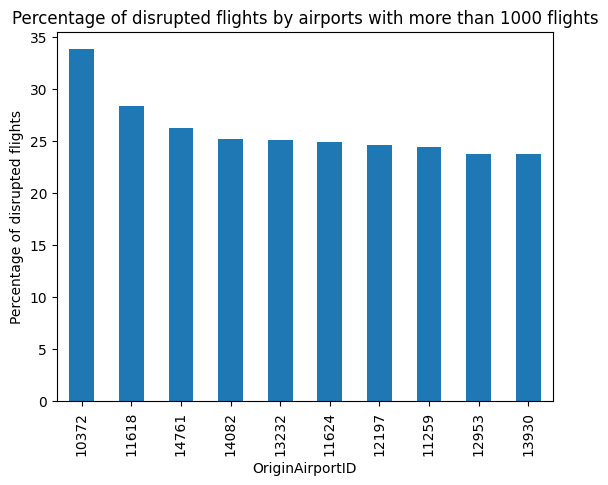

In [56]:
plt.ylabel("Percentage of disrupted flights")
plt.title("Percentage of disrupted flights by airports with more than 1000 flights")
(flights[flights["Disruption"] == 1]["OriginAirportID"].value_counts() / flights["OriginAirportID"].value_counts() * 100).sort_values(ascending=False).loc[lambda x: flights["OriginAirportID"].value_counts() > 1000].head(10).plot(kind="bar")


Print the number of entries for the airports with the highest percentage of disrupted flights for airports with more than 1000 entries:

In [57]:
airport_ID_value_counts_disrupted = flights[flights["Disruption"] == 1]["OriginAirportID"].value_counts()
airport_ID_value_counts = flights["OriginAirportID"].value_counts()
for airport in (airport_ID_value_counts_disrupted / airport_ID_value_counts * 100).loc[lambda x: airport_ID_value_counts > 1000].head(10).index:
    print(f'Number of entries for airport {airport}: {len(flights[flights["OriginAirportID"] == airport])}')

Number of entries for airport 10135: 1758
Number of entries for airport 10140: 7522
Number of entries for airport 10158: 1018
Number of entries for airport 10185: 1005
Number of entries for airport 10208: 1521
Number of entries for airport 10257: 5045
Number of entries for airport 10279: 1782
Number of entries for airport 10299: 6259
Number of entries for airport 10372: 2109
Number of entries for airport 10397: 109552


In [58]:

top_10_origin_airports_set = set(top_10_origin_airports.index)
top_10_airports_percentage = set((flights[flights["Disruption"] == 1]["OriginAirportID"]
                                  .value_counts() / flights["OriginAirportID"].value_counts() * 100)
                                  .loc[lambda x: flights["OriginAirportID"].value_counts() > 1000]
                                  .head(10).index)
print("Intersection of top 10 airports and top 10 airports by percentage of disrupted flights with more than 1000 entries: ",
       top_10_origin_airports_set.intersection(top_10_airports_percentage))

Intersection of top 10 airports and top 10 airports by percentage of disrupted flights with more than 1000 entries:  {10397}


In [59]:
print("Min, max, mean, median and standard deviation of the each origin airport's distrupted flights")

disruption_percentage = (flights.groupby("OriginAirportID")["Disruption"].mean() * 100)

print(disruption_percentage.agg(['min', 'max', 'mean', 'median', 'std']))

Q1 = disruption_percentage.quantile(0.25)
Q3 = disruption_percentage.quantile(0.75)

print(f'\nQ1: {Q1}, Q3: {Q3}')

Min, max, mean, median and standard deviation of the each origin airport's distrupted flights
min        5.863192
max       67.857143
mean      19.873841
median    19.230769
std        6.036840
Name: Disruption, dtype: float64

Q1: 16.687154433672042, Q3: 21.76180408738548


In [60]:
print("Min, max, mean, median and standard deviation of the each destination airport's distrupted flights")

disruption_percentage = (flights.groupby("DestAirportID")["Disruption"].mean() * 100)

print(disruption_percentage.agg(['min', 'max', 'mean', 'median', 'std']))

Q1 = disruption_percentage.quantile(0.25)
Q3 = disruption_percentage.quantile(0.75)

print(f'\nQ1: {Q1}, Q3: {Q3}')

Min, max, mean, median and standard deviation of the each destination airport's distrupted flights
min        0.000000
max       63.157895
mean      20.123296
median    19.913276
std        5.749271
Name: Disruption, dtype: float64

Q1: 17.56863973274872, Q3: 22.240407346790327


In [61]:
number_of_entries_per_airport = flights["OriginAirportID"].value_counts()

percentage_of_entries_per_airport = (flights["OriginAirportID"].value_counts() / len(flights) * 100)

# percentage of disrupted flights per airline
disruption_percentage_per_airport = (flights.groupby("OriginAirportID")["Disruption"].mean() * 100)

data = {
    'Number_of_entries': number_of_entries_per_airport,
    'Percentage_of_entries': percentage_of_entries_per_airport,
    'Percent_of_disrupted_flights': disruption_percentage_per_airport
}
df = pandas.DataFrame(data)

# Reset the index of the DataFrame to make the 'Operating_Airline' column accessible
df.reset_index(inplace=True)

# Rename the 'index' column to 'Operating_Airline'
df.rename(columns={'index': 'OriginAirportID'}, inplace=True)

print(df)

     OriginAirportID  Number_of_entries  Percentage_of_entries  \
0              10135               1758               0.075274   
1              10136                676               0.028945   
2              10140               7522               0.322079   
3              10141                242               0.010362   
4              10146                302               0.012931   
..               ...                ...                    ...   
382            15919               4093               0.175255   
383            15991                272               0.011647   
384            16101                334               0.014301   
385            16218                579               0.024792   
386            16869                268               0.011475   

     Percent_of_disrupted_flights  
0                       20.250284  
1                       21.005917  
2                       17.721351  
3                       16.115702  
4                       11.

In [62]:
number_of_entries_per_dest_airport = flights["DestAirportID"].value_counts()

percentage_of_entries_per_dest_airport = (flights["DestAirportID"].value_counts() / len(flights) * 100)

# percentage of disrupted flights per airline
disruption_percentage_per_dest_airport = (flights.groupby("DestAirportID")["Disruption"].mean() * 100)

data2 = {
    'Number_of_entries': number_of_entries_per_dest_airport,
    'Percentage_of_entries': percentage_of_entries_per_dest_airport,
    'Percent_of_disrupted_flights': disruption_percentage_per_dest_airport
}
df2 = pandas.DataFrame(data2)

# Reset the index of the DataFrame to make the 'Operating_Airline' column accessible
df2.reset_index(inplace=True)

# Rename the 'index' column to 'Operating_Airline'
df2.rename(columns={'index': 'DestAirportID'}, inplace=True)

print(df2)

     DestAirportID  Number_of_entries  Percentage_of_entries  \
0            10135               1759               0.075317   
1            10136                678               0.029031   
2            10140               7549               0.323235   
3            10141                237               0.010148   
4            10146                276               0.011818   
..             ...                ...                    ...   
382          15919               3993               0.170973   
383          15991                227               0.009720   
384          16101                359               0.015372   
385          16218                534               0.022865   
386          16869                239               0.010234   

     Percent_of_disrupted_flights  
0                       19.499716  
1                       16.961652  
2                       21.300835  
3                       16.033755  
4                       17.753623  
..             

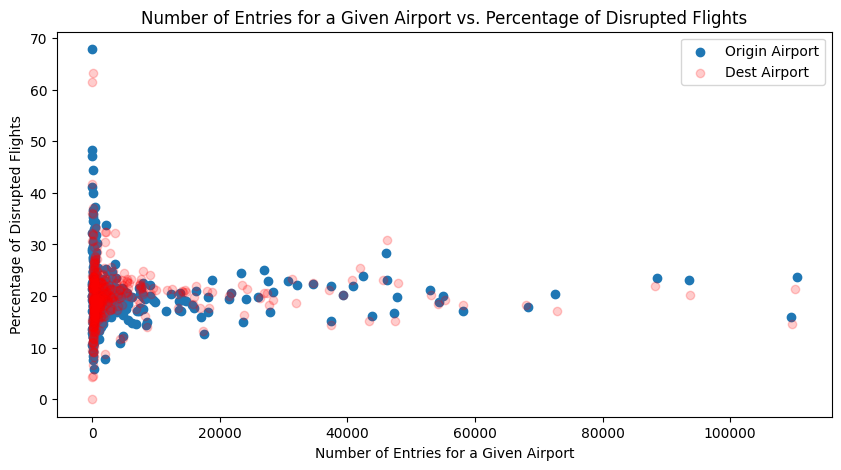

In [63]:
plt.figure(figsize=(10, 5))
plt.scatter(df["Number_of_entries"], df["Percent_of_disrupted_flights"], label='Origin Airport')
plt.scatter(df2["Number_of_entries"], df2["Percent_of_disrupted_flights"], color='red', label='Dest Airport', alpha=0.2)
plt.title('Number of Entries for a Given Airport vs. Percentage of Disrupted Flights')
plt.xlabel('Number of Entries for a Given Airport')
plt.ylabel('Percentage of Disrupted Flights')
plt.legend()
plt.show()

- Observations:
    - It can be observed that there is greater variance for airports with less entries, the number of disrupted flights has a large variance
        - As a transformation, it may be useful to represent the airports using the number of entries to capture this

## Explore the effect of Origin State on Disruption

In [64]:
flights["OriginState"].unique()

array(['CA', 'NY', 'IL', 'GA', 'CO', 'MI', 'FL', 'TX', 'SD', 'CT', 'SC',
       'MN', 'LA', 'OR', 'ID', 'NC', 'AZ', 'VA', 'NV', 'AL', 'PA', 'MA',
       'NJ', 'TN', 'IN', 'OH', 'MO', 'WA', 'WI', 'HI', 'UT', 'KY', 'KS',
       'OK', 'PR', 'ND', 'AR', 'AK', 'IA', 'MD', 'MT', 'WV', 'NM', 'MS',
       'VT', 'RI', 'NE', 'TT', 'ME', 'NH', 'VI', 'WY', 'DE'], dtype=object)

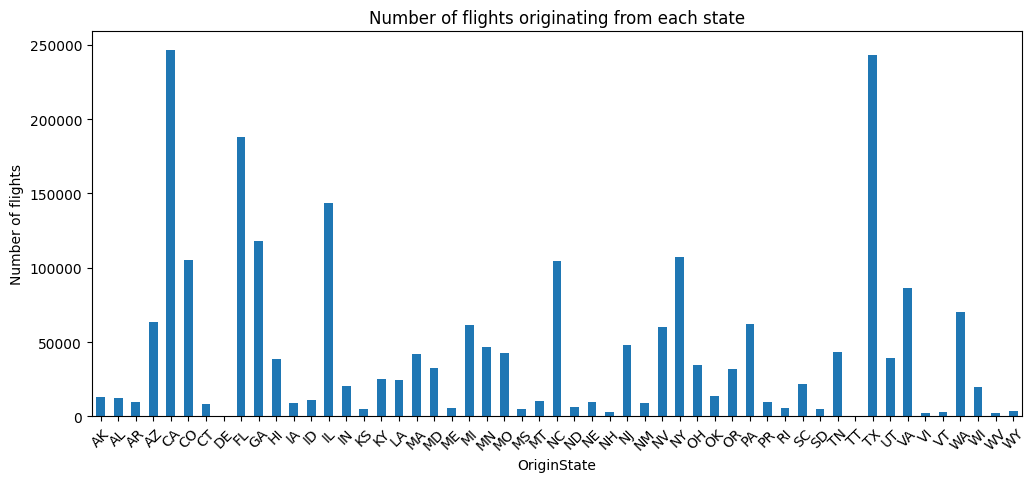

In [65]:
plt.ylabel("Number of flights")
plt.title("Number of flights originating from each state")
flights["OriginState"].value_counts().sort_index().plot(kind="bar")
plt.xticks(rotation=45)
plt.gcf().set_size_inches(12, 5)

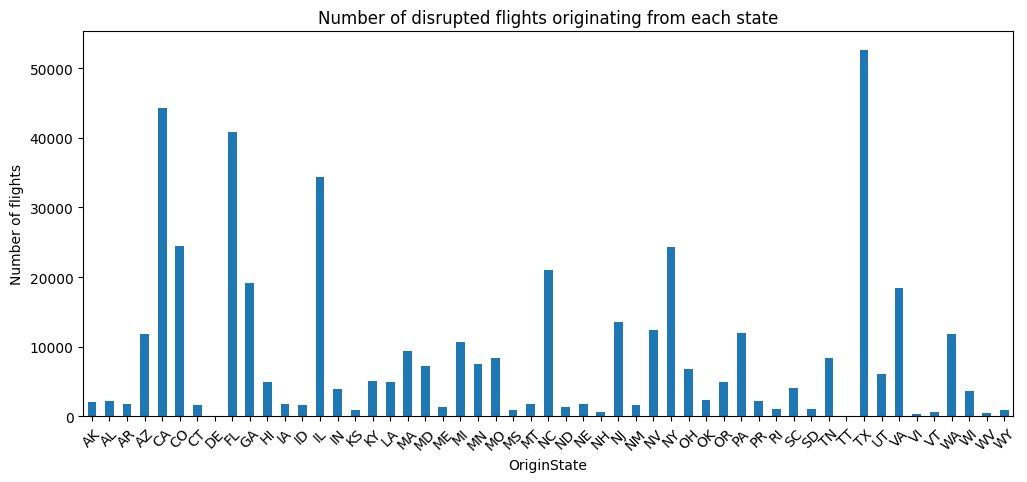

In [66]:
# plot the number of disrupted flights originating from each state
plt.ylabel("Number of flights")
plt.title("Number of disrupted flights originating from each state")
flights[flights["Disruption"] == 1]["OriginState"].value_counts().sort_index().plot(kind="bar")
plt.xticks(rotation=45)
plt.gcf().set_size_inches(12, 5)

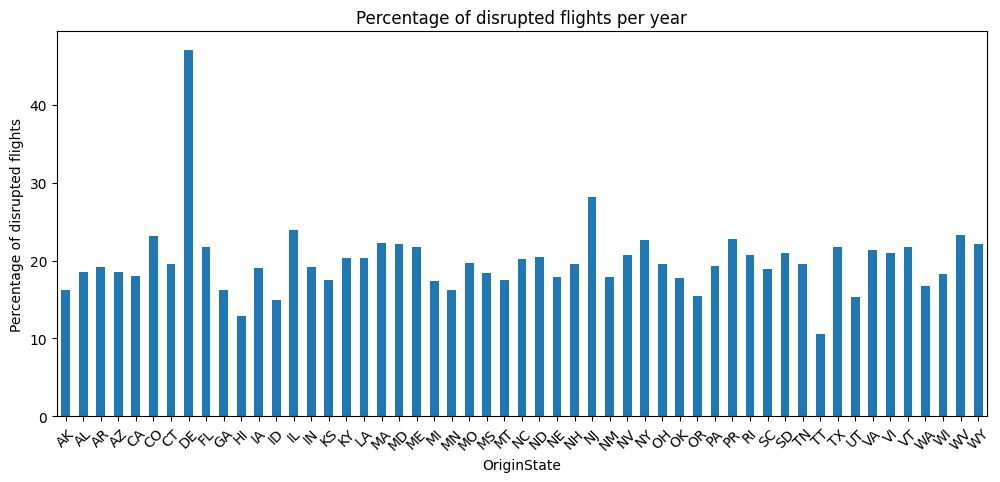

In [67]:
plt.ylabel("Percentage of disrupted flights")
plt.title("Percentage of disrupted flights per year")
(flights[flights["Disruption"] == 1]["OriginState"].value_counts().sort_index() / 
    flights["OriginState"].value_counts().sort_index() * 100).plot(kind="bar")
plt.xticks(rotation=45)
plt.gcf().set_size_inches(12, 5)

- There are too many states to encode so it would be reasonble to try find potential groupings
    - Attempting to do this with US census data of population and groups from 2020-2023
        - As the last full year from the given dataset is from 2021, the population data from this year is used below: 

In [68]:
# Data from https://www.census.gov/data/tables/time-series/demo/popest/2020s-state-total.html

state_data = pandas.read_csv("NST-EST2023-ALLDATA.csv")

pandas.set_option('display.max_columns', None)

# POPESTIMATE2021 is chosen as it is the latest year for the dataset with full data
state_data = state_data[["NAME", "REGION", "POPESTIMATE2021"]]


def lookup_state_abbr(name):
    state = us.states.lookup(name)
    if state is not None:
        return state.abbr
    else:
        return name

state_data["NAME"] = state_data["NAME"].apply(lookup_state_abbr).str.strip()


display(state_data)

,NAME,REGION,POPESTIMATE2021
0,United States,0,332048977
1,Northeast Region,1,57243423
2,New England,1,15106108
3,Middle Atlantic,1,42137315
4,Midwest Region,2,68850246
...,...,...,...
61,WA,4,7741433
62,WV,3,1785249
63,WI,2,5879978
64,WY,4,579548


In [69]:
duplicate_indices = state_data.index[state_data.index.duplicated()]

flights = flights.merge(state_data, left_on='OriginState', right_on='NAME', how='left')
flights.drop(columns=['NAME'], inplace=True)


There is no population data from the cenus for the US Virgin Islands or Trust Territories, therefore this data is filled in from Wikipedia information

In [70]:
flights["REGION"] = flights["REGION"].fillna("X")

In [71]:
# US Virgin Island population estimate is taken from April 1, 2020 from https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_population
flights.loc[flights["OriginState"] == "VI", "POPESTIMATE2021"] = 87146

In [72]:
# List all unique Origin and OriginCityName of the dataframe where POPESTIMATE2021 is missing
print(flights[flights["POPESTIMATE2021"].isna()]["OriginCityName"].unique())

['Guam' 'Saipan' 'Pago Pago' 'Rota']


Guam, Pago Pago, Rota & Saipan are a part of the territories of Guam, American Samoa, and the Norhtern Marina Islands respectively. Thefore it would be useful to fill the data on the average population of these territories

In [73]:
# Guam, American Som
guam_population = 153836
american_samoa_population = 49710
norhtern_mariana_islands_population = 47329

avg_TT_population = (guam_population + american_samoa_population + norhtern_mariana_islands_population) / 3

In [74]:
flights.loc[flights["OriginState"] == "TT", "POPESTIMATE2021"] = avg_TT_population


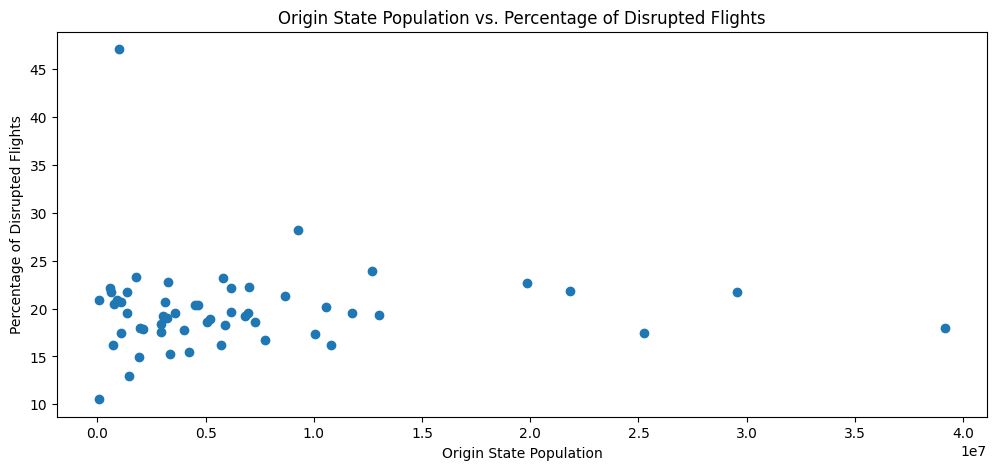

In [75]:
# Calculate the percentage of disrupted flights for each population bucket
disrupted_flights_by_population = flights.groupby("POPESTIMATE2021")["Disruption"].mean() * 100

# Plot the scatter plot
plt.figure(figsize=(12, 5))
plt.scatter(disrupted_flights_by_population.index, disrupted_flights_by_population.values)
plt.title('Origin State Population vs. Percentage of Disrupted Flights')
plt.xlabel('Origin State Population')
plt.ylabel('Percentage of Disrupted Flights')
plt.show()

<h3>Grouping states by region</h3>

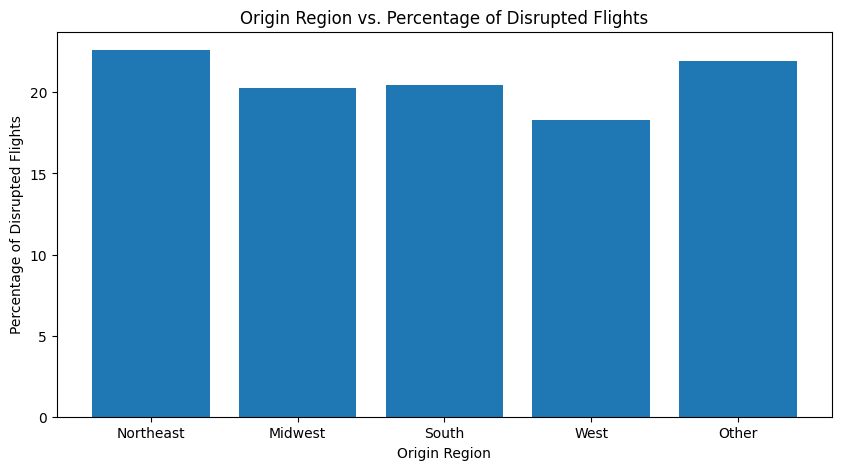

In [76]:
disrupted_flights_by_population = flights.groupby("REGION")["Disruption"].mean() * 100

# Plot the scatter plot
plt.figure(figsize=(10, 5))
plt.bar(disrupted_flights_by_population.index, disrupted_flights_by_population.values)
plt.title('Origin Region vs. Percentage of Disrupted Flights')
plt.xlabel('Origin Region')
plt.ylabel('Percentage of Disrupted Flights')
plt.xticks([0, 1, 2, 3, 4], ["Northeast", "Midwest", "South", "West", "Other"])
plt.show()

Observations:
- There appears to be some difference in percentage of disrupted flights with West being slightly below the average
- No clear trend amongst the population size and percentage of disruptions


# Data Cleaning & Preperation

## Check for null values for chosen attributes

In [77]:
attributes = ["Year", "Month", "Operating_Airline", "DepTimeBlk", "OriginAirportID", "DestAirportID", "Distance", "REGION", "Disruption"]


flights = flights[attributes]

In [78]:
# Find if any of the columns have missing values
flights.isna().sum()

Year                 0
Month                0
Operating_Airline    0
DepTimeBlk           0
OriginAirportID      0
DestAirportID        0
Distance             0
REGION               0
Disruption           0
dtype: int64

In [79]:
flights.dtypes


Year                  int64
Month                 int64
Operating_Airline    object
DepTimeBlk           object
OriginAirportID       int64
DestAirportID         int64
Distance              int64
REGION               object
Disruption             bool
dtype: object

In [80]:
# Convert columns to the correct data type
flights["Year"] = flights["Year"].astype('category')
flights["Month"] = flights["Month"].astype('category')
flights["Operating_Airline"] = flights["Operating_Airline"].astype('category')
flights["DepTimeBlk"] = flights["DepTimeBlk"].astype('category')
flights["OriginAirportID"] = flights["OriginAirportID"].astype('category')
flights["DestAirportID"] = flights["DestAirportID"].astype('category')
flights["REGION"] = flights["REGION"].astype('category')

In [81]:
flights.dtypes

Year                 category
Month                category
Operating_Airline    category
DepTimeBlk           category
OriginAirportID      category
DestAirportID        category
Distance                int64
REGION               category
Disruption               bool
dtype: object

In [82]:
flights

,Year,Month,Operating_Airline,DepTimeBlk,OriginAirportID,DestAirportID,Distance,REGION,Disruption
0,2021,5,OO,1100-1159,13796,12892,337,4,False
1,2021,11,PT,1700-1759,10257,14100,212,1,False
2,2021,12,OO,1500-1559,13930,11423,299,2,False
3,2021,7,HA,0900-0959,14771,12173,2398,4,False
4,2021,7,DL,1900-1959,10397,15304,406,3,False
...,...,...,...,...,...,...,...,...,...
2345740,2019,6,NK,1700-1759,13204,10431,488,3,False
2345741,2019,11,UA,0600-0659,11292,13930,888,4,False
2345742,2019,4,NK,1700-1759,14524,11697,805,3,False
2345743,2019,2,UA,0900-0959,13930,12953,733,2,False


## Prepare Pipeline

- Year, Month, and DepTimeBlk have some form of ordering so ordinal encoding seems appropriate
- Given that there are over 10 features for airline and airports, one-hot-coding would drastically affect the computational complexity of training the models. One method of dealing with this is through target encoding as it replaces these feature's categories with a number derived from the target
- As there are very few flights that travel greater than 2,750 miles, distance is capped at 2,750 before being normalised
- Given that there are only 5 regions, one-hot-encoding seems appropriate

In [118]:
'''
Year -> Ordinal
Month -> Ordinal
Operating_Airline -> Target Encode
DepTimeBlk -> Ordinal
OriginAirportID -> Target Encode
DestAirportID -> Target Encode
Distance -> Max at 2750 then normalize
REGION -> One hot encode
'''


target_columns = ["Operating_Airline", "OriginAirportID", "DestAirportID"]
one_hot_columns = ["REGION"]
numerical_columns = ["Distance"]

year_order = ["2018", "2019", "2020", "2021", "2022"]
time_order = ["0001-0559", "0600-0659", "0700-0759", "0800-0859", "0900-0959", "1000-1059", "1100-1159", 
              "1200-1259", "1300-1359", "1400-1459", "1500-1559", "1600-1659", "1700-1759", "1800-1859", 
              "1900-1959", "2000-2059", "2100-2159", "2200-2259", "2300-2359"]

target_transformer = Pipeline(steps=[
    ('target_encode', TargetEncoder())
])

year_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[year_order]))
])

time_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[time_order]))
])

one_hot_transformer = Pipeline(steps=[
    ('one_hot', OneHotEncoder())
])

numerical_transformer = Pipeline(steps=[
    ('cap_distance', FunctionTransformer(lambda x: x.clip(upper=2750))),
    ('scale_distance', MinMaxScaler())
])

pipeline = ColumnTransformer(
    transformers=[
        ('target', target_transformer, target_columns),
        ('year_tranformer', year_transformer, ['Year']),
        ('time_transformer', time_transformer, ['DepTimeBlk']),
        ('one_hot', one_hot_transformer, one_hot_columns),
        ('numerical', numerical_transformer, numerical_columns)
    ],
    remainder='passthrough')


# Split features and target variable
X = flights.drop('Disruption', axis=1)
y = flights['Disruption']

X_processed = pipeline.fit_transform(X, y)

print(X.iloc[0])
print(X_processed[0])

/home/ejml1/.local/lib/python3.9/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/home/ejml1/.local/lib/python3.9/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/home/ejml1/.local/lib/python3.9/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprec

Year                      2021
Month                        5
Operating_Airline           OO
DepTimeBlk           1100-1159
OriginAirportID          13796
DestAirportID            12892
Distance                   337
REGION                       4
Name: 0, dtype: object
[0.18245403 0.18256391 0.18331798 3.         6.         0.
 0.         0.         1.         0.         0.11741039 5.        ]


In [128]:
kfold = KFold(n_splits=5, shuffle=True, random_state=5059)

tree_classifier = DecisionTreeClassifier(random_state=5059)
random_forest_classifier = RandomForestClassifier(random_state=5059, n_estimators=10)
logistic_regression = LogisticRegression(random_state=5059, max_iter=1000)

In [122]:
tree_scores = cross_val_score(tree_classifier, X_processed, y, cv=kfold, scoring='balanced_accuracy')

In [123]:
random_forest_scores = cross_val_score(random_forest_classifier, X_processed, y, cv=kfold, scoring='balanced_accuracy')


In [129]:
logistic_regression_scores = cross_val_score(logistic_regression, X_processed, y, cv=kfold, scoring='balanced_accuracy')

In [127]:
print("Decision Tree Cross-validation Scores:", tree_scores)
print("Mean balanced accuracy:", tree_scores.mean())
print("Standard deviation of balanced accuracy:", tree_scores.std())
print()

print("Random Forest Cross-validation Scores:", random_forest_scores)
print("Mean balanced accuracy:", random_forest_scores.mean())
print("Standard deviation of balanced accuracy:", random_forest_scores.std())
print()

print("Logistic Regression Cross-validation Scores:", logistic_regression_scores)
print("Mean balanced accuracy:", logistic_regression_scores.mean())
print("Standard deviation of balanced accuracy:", logistic_regression_scores.std())

Decision Tree Cross-validation Scores: [0.54760722 0.54715908 0.54763303 0.54769133 0.54852273]
Mean balanced accuracy: 0.5477226773341338
Standard deviation of balanced accuracy: 0.0004427353245215486

Random Forest Cross-validation Scores: [0.5518712  0.55264433 0.55248391 0.55282673 0.55269161]
Mean balanced accuracy: 0.5525035563291246
Standard deviation of balanced accuracy: 0.0003346278480412187

Logistic Regression Cross-validation Scores: [0.50036266 0.50052169 0.50034494 0.5003733  0.50043013]
Mean balanced accuracy: 0.5004065426351271
Standard deviation of balanced accuracy: 6.424878952944323e-05


Given that the three classifiers used have next to no difference in balanced accuracy, I will choose the DecisionTreeClassifier as my main model due to the speed of training time

In [130]:
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=5059)

In [131]:
tree_classifier.fit(X_train, y_train)

# Get feature importances
importances = tree_classifier.feature_importances_

In [132]:
y_pred = tree_classifier.predict(X_val)

accuracy = skm.accuracy_score(y_val, y_pred)
bal_accuracy = skm.balanced_accuracy_score(y_val, y_pred)
precision = skm.precision_score(y_val, y_pred)
recall = skm.recall_score(y_val, y_pred)
f1 = skm.f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Balanced Accuracy:", bal_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7458845697209202
Balanced Accuracy: 0.5476072235318384
Precision: 0.3125652200601559
Recall: 0.21487498681295494
F1-score: 0.2546732185503332


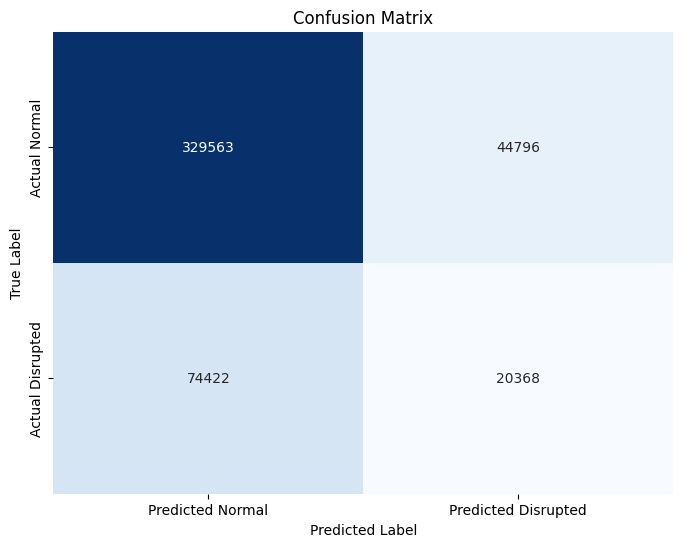

In [133]:
cm = skm.confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Normal', 'Predicted Disrupted'], 
            yticklabels=['Actual Normal', 'Actual Disrupted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Normalised Confusion Matrix')

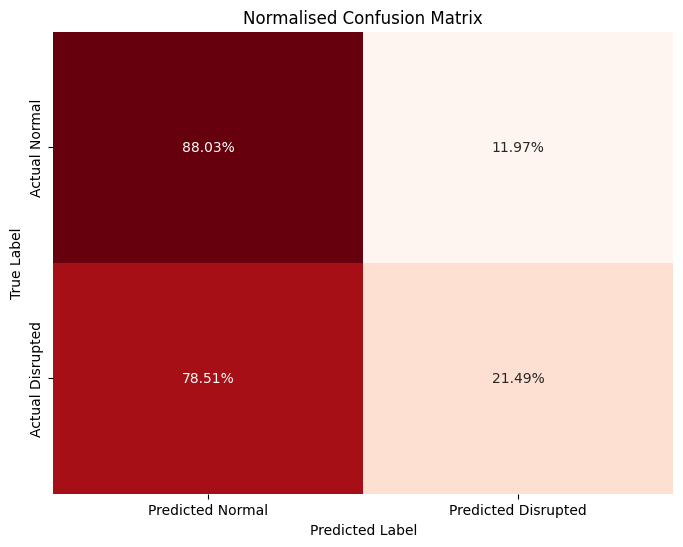

In [134]:
cm = cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Reds', cbar=False, 
            xticklabels=['Predicted Normal', 'Predicted Disrupted'], 
            yticklabels=['Actual Normal', 'Actual Disrupted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalised Confusion Matrix')

In [135]:
tree_preds = tree_classifier.predict_proba(X_val)[:, 1]
FPR_tree, TPR_tree, threshholds_tree = skm.roc_curve(y_val, tree_preds)

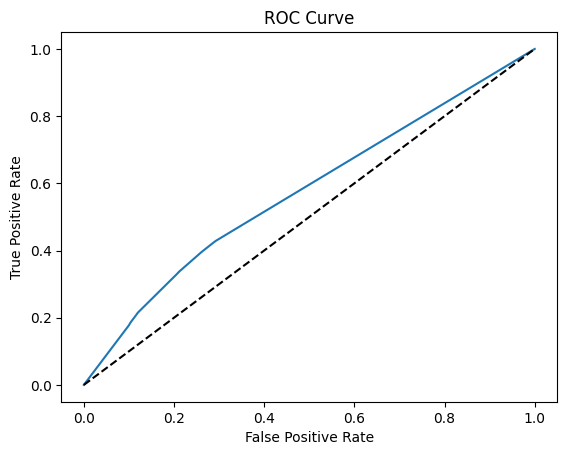

In [136]:
plt.plot(FPR_tree, TPR_tree, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

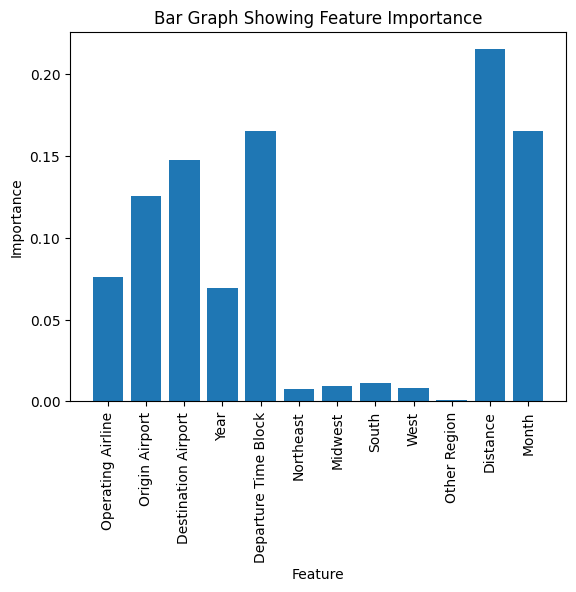

In [137]:
indices = range(len(importances))

features = ["Operating Airline", "Origin Airport", "Destination Airport", "Year", "Departure Time Block", 
            "Northeast", "Midwest", "South", "West", "Other Region", "Distance", "Month"]

plt.bar(indices, importances)

plt.xticks(indices, features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Bar Graph Showing Feature Importance')

plt.show()

- Region does not appear to have significant importance as a feature
- Remove it as a feature to save computation time

In [138]:
print("Depth of decision tree:", tree_classifier.get_depth())

Depth of decision tree: 52


- Given the depth of the tree is 52 nodes, it is difficult to to visualise

## Fine tuning

In [139]:
region_cols = [5, 6, 7, 8, 9]

cols_to_keep = np.ones(X_processed.shape[1], dtype=bool)
cols_to_keep[region_cols] = False

X_train_drop_regions = X_train[:, cols_to_keep]
X_val_drop_regions = X_val[:, cols_to_keep]

In [140]:
param_grid = [
    {
        'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 4}, {0: 1, 1: 8}],
        'max_depth': [None, 20, 40],
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [2, 4, 8]
    }
]

tree_grid_search = GridSearchCV(tree_classifier, param_grid, cv=kfold, scoring='balanced_accuracy', return_train_score=True)

tree_grid_search.fit(X_train_drop_regions, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=5059, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=5059),
             param_grid=[{'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                           {0: 1, 1: 4}, {0: 1, 1: 8}],
                          'criterion': ['gini', 'entropy'],
                          'max_depth': [None, 20, 40],
                          'min_samples_split': [2, 4, 8]}],
             return_train_score=True, scoring='balanced_accuracy')

In [141]:
grid_search_results = pandas.DataFrame(tree_grid_search.cv_results_)
grid_search_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.928222,0.086017,0.216824,0.004113,"{0: 1, 1: 1}",gini,None,2,"{'class_weight': {0: 1, 1: 1}, 'criterion': 'g...",0.546749,0.546025,0.546578,0.546139,0.545906,0.546279,0.000327,66,0.776071,0.775804,0.775920,0.776359,0.776312,0.776093,0.000216
1,7.912848,0.126023,0.218581,0.003722,"{0: 1, 1: 1}",gini,None,4,"{'class_weight': {0: 1, 1: 1}, 'criterion': 'g...",0.547071,0.547011,0.546754,0.547072,0.547244,0.547030,0.000159,62,0.761646,0.760958,0.761526,0.761503,0.762200,0.761567,0.000396
2,7.744467,0.093996,0.194247,0.002884,"{0: 1, 1: 1}",gini,None,8,"{'class_weight': {0: 1, 1: 1}, 'criterion': 'g...",0.549070,0.549639,0.550082,0.549238,0.549908,0.549587,0.000385,58,0.726548,0.726884,0.726833,0.726916,0.726909,0.726818,0.000138
3,6.914394,0.064272,0.135173,0.003357,"{0: 1, 1: 1}",gini,20,2,"{'class_weight': {0: 1, 1: 1}, 'criterion': 'g...",0.536315,0.537382,0.536710,0.536577,0.537205,0.536838,0.000397,69,0.625603,0.625685,0.622016,0.621718,0.621917,0.623388,0.001845
4,6.822307,0.080303,0.134180,0.002414,"{0: 1, 1: 1}",gini,20,4,"{'class_weight': {0: 1, 1: 1}, 'criterion': 'g...",0.536619,0.537855,0.536314,0.536212,0.537199,0.536840,0.000613,68,0.622902,0.623032,0.619257,0.619189,0.619269,0.620730,0.001827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,7.363481,0.229743,0.139697,0.005618,"{0: 1, 1: 8}",entropy,20,4,"{'class_weight': {0: 1, 1: 8}, 'criterion': 'e...",0.577713,0.576986,0.576624,0.573595,0.574287,0.575841,0.001606,17,0.695957,0.694772,0.693247,0.692214,0.689273,0.693092,0.002298
68,6.909065,0.063716,0.135266,0.001443,"{0: 1, 1: 8}",entropy,20,8,"{'class_weight': {0: 1, 1: 8}, 'criterion': 'e...",0.578307,0.577255,0.576755,0.573829,0.574749,0.576179,0.001648,16,0.690230,0.689127,0.687602,0.686504,0.683610,0.687415,0.002289
69,8.416648,0.047387,0.225410,0.003966,"{0: 1, 1: 8}",entropy,40,2,"{'class_weight': {0: 1, 1: 8}, 'criterion': 'e...",0.563399,0.564872,0.563239,0.561425,0.563144,0.563216,0.001094,38,0.909587,0.908475,0.909203,0.909324,0.908869,0.909091,0.000385
70,8.344545,0.034811,0.221996,0.001574,"{0: 1, 1: 8}",entropy,40,4,"{'class_weight': {0: 1, 1: 8}, 'criterion': 'e...",0.564867,0.566504,0.565771,0.563581,0.564998,0.565144,0.000978,31,0.898427,0.897401,0.898125,0.897927,0.897713,0.897918,0.000350


In [142]:
print(tree_grid_search.best_params_)

{'class_weight': {0: 1, 1: 4}, 'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 8}


In [143]:
tree_classifier = DecisionTreeClassifier(random_state=5059, class_weight={0: 1, 1: 4}, max_depth=20, criterion='entropy', min_samples_split=8)

tree_classifier.fit(X_train_drop_regions, y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 4}, criterion='entropy',
                       max_depth=20, min_samples_split=8, random_state=5059)

In [144]:
y_pred = tree_classifier.predict(X_val_drop_regions)

accuracy = skm.accuracy_score(y_val, y_pred)
bal_accuracy = skm.balanced_accuracy_score(y_val, y_pred)
precision = skm.precision_score(y_val, y_pred)
recall = skm.recall_score(y_val, y_pred)
f1 = skm.f1_score(y_val, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Balanced Accuracy:", bal_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6259077606474702
Balanced Accuracy: 0.6063858782699771
Precision: 0.28699007194016773
Recall: 0.5736259099061083
F1-score: 0.382574678191611


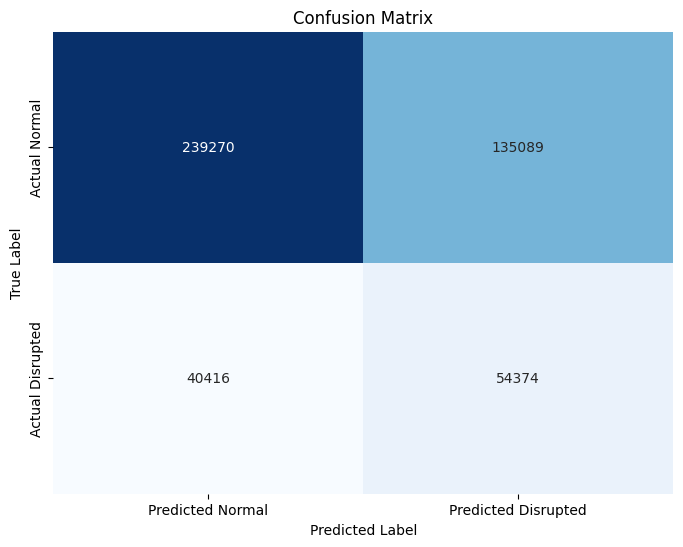

In [145]:
cm = skm.confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Normal', 'Predicted Disrupted'], 
            yticklabels=['Actual Normal', 'Actual Disrupted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Normalised Confusion Matrix')

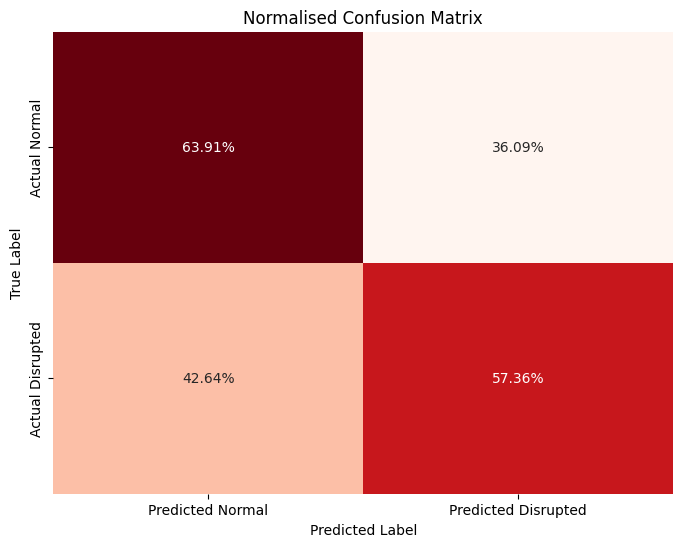

In [146]:
cm = cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Reds', cbar=False, 
            xticklabels=['Predicted Normal', 'Predicted Disrupted'], 
            yticklabels=['Actual Normal', 'Actual Disrupted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalised Confusion Matrix')

In [163]:
tree_preds = tree_classifier.predict_proba(X_val_drop_regions)[:, 1]
FPR_tree, TPR_tree, threshholds_tree = skm.roc_curve(y_val, tree_preds)

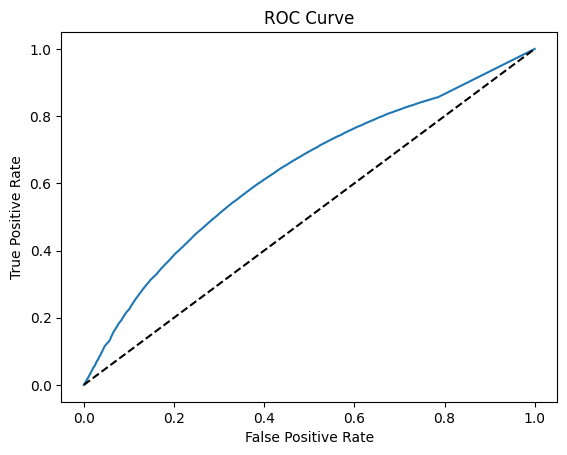

In [164]:
plt.plot(FPR_tree, TPR_tree, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

In [148]:
param_grid = [
    {
        'class_weight': [{0: 1, 1: 8}, {0: 1, 1: 16}, {0: 1, 1: 32}, {0: 1, 1: 64}, {0: 1, 1: 128}, {0: 1, 1: 256}]
    }
]

tree_grid_search = GridSearchCV(tree_classifier, param_grid, cv=kfold, scoring='balanced_accuracy', return_train_score=True)

tree_grid_search.fit(X_train_drop_regions, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=5059, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight={0: 1, 1: 4},
                                              criterion='entropy', max_depth=20,
                                              min_samples_split=8,
                                              random_state=5059),
             param_grid=[{'class_weight': [{0: 1, 1: 8}, {0: 1, 1: 16},
                                           {0: 1, 1: 32}, {0: 1, 1: 64},
                                           {0: 1, 1: 128}, {0: 1, 1: 256}]}],
             return_train_score=True, scoring='balanced_accuracy')

In [149]:
print(tree_grid_search.best_params_)

{'class_weight': {0: 1, 1: 8}}


# Evaluate Performance on Test

In [150]:
print(f'Number of N/A values in Disruption: {flights_test["Disruption"].isna().sum()}')

Number of N/A values in Disruption: 15


Drop empty disruption values

In [151]:
flights_test = flights_test.dropna(subset=["Disruption"])

In [160]:

# Merge the state data with the flights_test dataframe
X_test = flights_test.merge(state_data, left_on='OriginState', right_on='NAME', how='left')

X_test["REGION"] = X_test["REGION"].fillna("X")
 
X_test = X_test[attributes]

# # Convert columns to the correct data type
X_test["Year"] = X_test["Year"].astype('category')
X_test["Month"] = X_test["Month"].astype('category')
X_test["Operating_Airline"] = X_test["Operating_Airline"].astype('category')
X_test["DepTimeBlk"] = X_test["DepTimeBlk"].astype('category')
X_test["OriginAirportID"] = X_test["OriginAirportID"].astype('category')
X_test["DestAirportID"] = X_test["DestAirportID"].astype('category')


# Split features and target variable
y_test = X_test['Disruption']
X_test = X_test.drop('Disruption', axis=1)

X_test_processed = pipeline.transform(X_test)

X_test_drop_regions = X_test_processed[:, cols_to_keep]

/home/ejml1/.local/lib/python3.9/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)
/home/ejml1/.local/lib/python3.9/site-packages/category_encoders/ordinal.py:198: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X[column] = X[column].astype("object").fillna(np.nan).map(col_mapping)


[ 0.20393475  0.23520042  0.19590353  3.         12.          0.
  0.          1.          0.          0.          0.21470373 10.        ]
[ 0.20393475  0.23520042  0.19590353  3.         12.          0.21470373
 10.        ]


In [168]:
y_pred = tree_classifier.predict(X_test_drop_regions)

accuracy = skm.accuracy_score(y_test, y_pred)
bal_accuracy = skm.balanced_accuracy_score(y_test, y_pred)
precision = skm.precision_score(y_test, y_pred)
recall = skm.recall_score(y_test, y_pred)
f1 = skm.f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Balanced Accuracy:", bal_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.6240882820906798
Balanced Accuracy: 0.6038558380579644
Precision: 0.28128694477284244
Recall: 0.570220487537661
F1-score: 0.3767332443620077


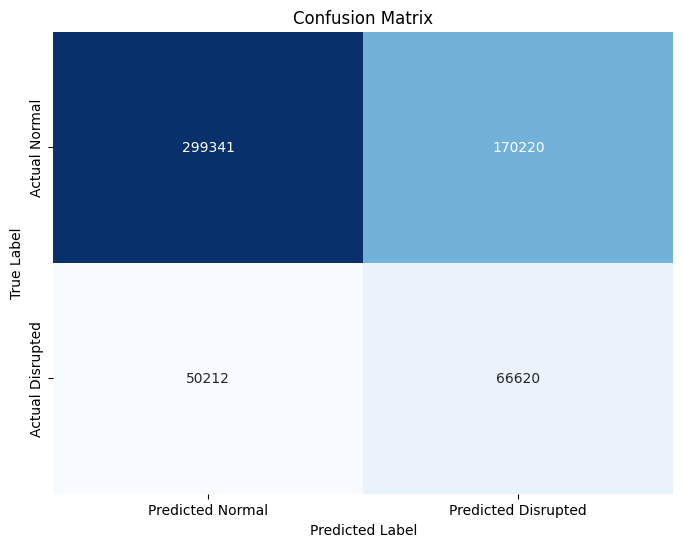

In [169]:
cm = skm.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Predicted Normal', 'Predicted Disrupted'], 
            yticklabels=['Actual Normal', 'Actual Disrupted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

Text(0.5, 1.0, 'Normalised Confusion Matrix')

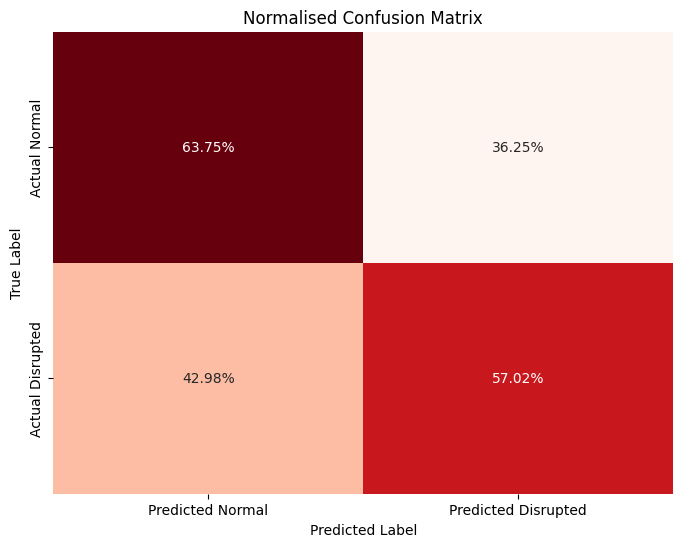

In [170]:
cm = cm / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='.2%', cmap='Reds', cbar=False, 
            xticklabels=['Predicted Normal', 'Predicted Disrupted'], 
            yticklabels=['Actual Normal', 'Actual Disrupted'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Normalised Confusion Matrix')

In [171]:
tree_preds = tree_classifier.predict_proba(X_test_drop_regions)[:, 1]
FPR_tree, TPR_tree, threshholds_tree = skm.roc_curve(y_test, tree_preds)

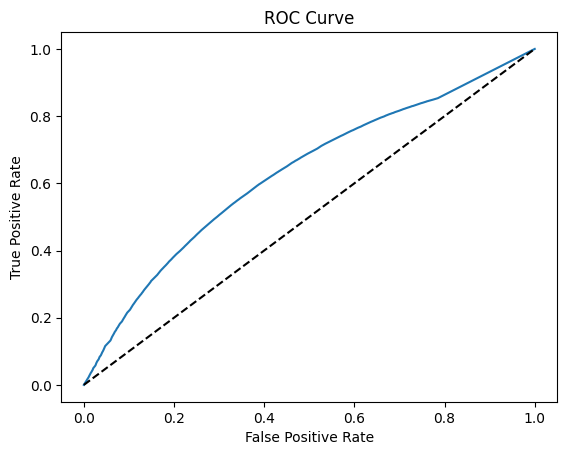

In [172]:
plt.plot(FPR_tree, TPR_tree, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')